### Data Preprocessing

#### Overview of the Dataset

In [39]:
#imports libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

In [41]:
#load the dataset
df=pd.read_csv("/Users/nandhinichandran/Downloads/Finalproject/dataset.csv")
df

,Customer_Id,Age,Monthly_Income,Credit_Score,Credit_Score_Band,Loan_Amount,Interest_Rate,Loan_Term,Loan_Type,Debt_Income,...,Transaction_Date,Transaction_Year,Transaction_Month,Product_Id,Product_Name,Interaction_Date,Interaction_Year,Interaction_Day_Name,Interaction_Type,Transaction_Frequency
0,C041,40,77600.82,727,Good,247409.36,13.92,60,Mortgage,3.188231,...,2024-06-03,2024,6,P039,Loan Against Property,2024-09-25,2024,Wednesday,Clicked,3
1,C060,53,36531.54,730,Good,250911.34,11.07,24,Mortgage,6.868348,...,2024-08-02,2024,8,P027,Holiday Loan,2024-03-10,2024,Sunday,Purchased,4
2,C084,32,50816.08,347,Poor,905057.16,11.19,48,Personal,17.810448,...,2024-05-26,2024,5,P035,Real Estate Investment,2024-03-12,2024,Tuesday,Purchased,10
3,C048,45,51785.62,682,Good,144095.67,12.43,24,Business,2.782542,...,2024-07-10,2024,7,P06,Auto Loan,2024-09-30,2024,Monday,Viewed,1
4,C011,37,25006.52,562,Poor,272298.26,6.47,48,Personal,10.889091,...,2024-11-15,2024,11,P034,Stock Investment,2024-06-28,2024,Friday,Clicked,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C085,22,186552.08,762,Excellent,107116.32,1.62,60,Personal,0.574190,...,2024-07-15,2024,7,P022,Short-Term Loan,2024-02-19,2024,Monday,Clicked,7
996,C044,65,56283.88,609,Fair,903302.58,14.38,24,Auto,16.049046,...,2024-05-20,2024,5,P035,Real Estate Investment,2024-02-18,2024,Sunday,Clicked,1
997,C025,21,133444.58,679,Good,251429.16,2.84,24,Education,1.884147,...,2024-10-28,2024,10,P028,Debt Consolidation Loan,2024-10-26,2024,Saturday,Clicked,1
998,C036,68,127035.20,359,Poor,798708.73,12.69,36,Auto,6.287302,...,2024-08-12,2024,8,P07,Business Loan,2024-03-15,2024,Friday,Clicked,4


In [43]:
df.shape

(1000, 25)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_Id            1000 non-null   object 
 1   Age                    1000 non-null   int64  
 2   Monthly_Income         1000 non-null   float64
 3   Credit_Score           1000 non-null   int64  
 4   Credit_Score_Band      1000 non-null   object 
 5   Loan_Amount            1000 non-null   float64
 6   Interest_Rate          1000 non-null   float64
 7   Loan_Term              1000 non-null   int64  
 8   Loan_Type              1000 non-null   object 
 9   Debt_Income            1000 non-null   float64
 10  Repayment_Status       1000 non-null   int64  
 11  Transaction_Id         1000 non-null   object 
 12  Gender                 1000 non-null   object 
 13  Transaction_Amount     1000 non-null   float64
 14  Transaction_Type       1000 non-null   object 
 15  Trans

In [47]:
df.dtypes

Customer_Id               object
Age                        int64
Monthly_Income           float64
Credit_Score               int64
Credit_Score_Band         object
Loan_Amount              float64
Interest_Rate            float64
Loan_Term                  int64
Loan_Type                 object
Debt_Income              float64
Repayment_Status           int64
Transaction_Id            object
Gender                    object
Transaction_Amount       float64
Transaction_Type          object
Transaction_Date          object
Transaction_Year           int64
Transaction_Month          int64
Product_Id                object
Product_Name              object
Interaction_Date          object
Interaction_Year           int64
Interaction_Day_Name      object
Interaction_Type          object
Transaction_Frequency      int64
dtype: object

In [49]:
df["Transaction_Date"]=pd.to_datetime(df["Interaction_Date"])
df["Interaction_Date"]=pd.to_datetime(df["Interaction_Date"])
df["Transaction_Year"]=df["Transaction_Year"].astype("category")
df["Transaction_Month"]=df["Transaction_Month"].astype("category")
df["Interaction_Year"]=df["Interaction_Year"].astype("category")
df[df.select_dtypes(include="object").columns]=df.select_dtypes(include="object").astype("category")

In [51]:
df.dtypes

Customer_Id                    category
Age                               int64
Monthly_Income                  float64
Credit_Score                      int64
Credit_Score_Band              category
Loan_Amount                     float64
Interest_Rate                   float64
Loan_Term                         int64
Loan_Type                      category
Debt_Income                     float64
Repayment_Status                  int64
Transaction_Id                 category
Gender                         category
Transaction_Amount              float64
Transaction_Type               category
Transaction_Date         datetime64[ns]
Transaction_Year               category
Transaction_Month              category
Product_Id                     category
Product_Name                   category
Interaction_Date         datetime64[ns]
Interaction_Year               category
Interaction_Day_Name           category
Interaction_Type               category
Transaction_Frequency             int64


In [53]:
df.isnull().sum()

Customer_Id              0
Age                      0
Monthly_Income           0
Credit_Score             0
Credit_Score_Band        0
Loan_Amount              0
Interest_Rate            0
Loan_Term                0
Loan_Type                0
Debt_Income              0
Repayment_Status         0
Transaction_Id           0
Gender                   0
Transaction_Amount       0
Transaction_Type         0
Transaction_Date         0
Transaction_Year         0
Transaction_Month        0
Product_Id               0
Product_Name             0
Interaction_Date         0
Interaction_Year         0
Interaction_Day_Name     0
Interaction_Type         0
Transaction_Frequency    0
dtype: int64

In [55]:
df.describe()

,Age,Monthly_Income,Credit_Score,Loan_Amount,Interest_Rate,Loan_Term,Debt_Income,Repayment_Status,Transaction_Amount,Transaction_Date,Interaction_Date,Transaction_Frequency
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
mean,42.998000,108677.344560,575.670000,551321.812020,7.847810,35.616000,7.131514,0.196000,990.622700,2024-06-22 11:19:40.800000,2024-06-22 11:19:40.800000,4.936000
min,18.000000,20286.770000,300.000000,101852.840000,1.010000,12.000000,0.574190,0.000000,6.360000,2023-12-21 00:00:00,2023-12-21 00:00:00,1.000000
25%,30.000000,62039.080000,436.750000,326776.867500,4.330000,24.000000,3.000012,0.000000,490.765000,2024-03-23 18:00:00,2024-03-23 18:00:00,2.000000
50%,43.000000,110502.485000,576.500000,555700.365000,7.595000,36.000000,5.185003,0.000000,1015.025000,2024-06-24 00:00:00,2024-06-24 00:00:00,5.000000
75%,56.000000,153386.447500,715.000000,774731.552500,11.392500,48.000000,8.601715,0.000000,1478.777500,2024-09-26 00:00:00,2024-09-26 00:00:00,7.000000
max,70.000000,199923.320000,850.000000,998769.210000,14.940000,60.000000,44.288324,1.000000,1995.090000,2024-12-20 00:00:00,2024-12-20 00:00:00,10.000000
std,14.961546,52447.182587,159.709362,262066.917959,4.051315,16.821162,6.507533,0.397167,567.492427,NaN,NaN,2.950697


In [57]:
df.duplicated().sum()

0

### Exploratory Data Analysis

Pie chart for categorical columns

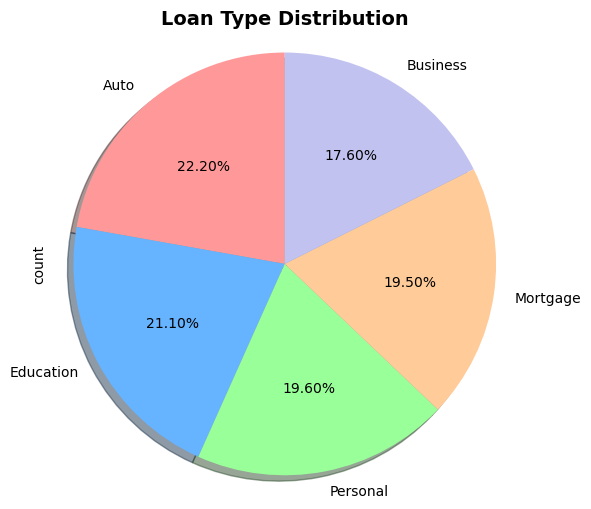

In [61]:
#pie chart for loan type
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
fig, ax = plt.subplots(figsize=(6,6))
df["Loan_Type"].value_counts().plot.pie(autopct="%1.2f%%", colors=colors, shadow=True, startangle=90, ax=ax)
ax.set_title("Loan Type Distribution", fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular.
plt.show()


#### Insight

This pie chart displays the distribution of loan purposes among customers. It shows that the Mortgaes are the most common loan type followed by Education,Auto, Business and Personal

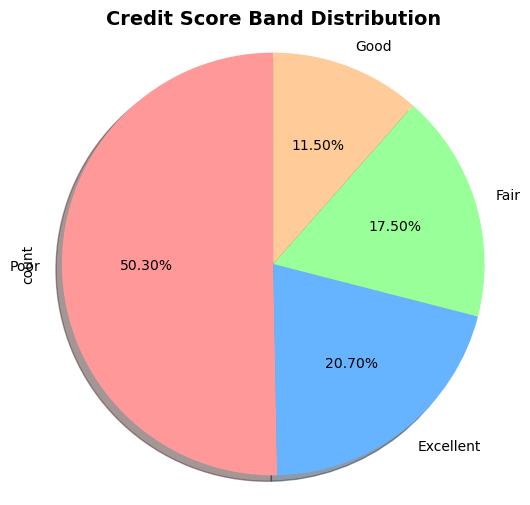

In [65]:
#pie chart for credit score band
fig, ax = plt.subplots(figsize=(6,6))
df["Credit_Score_Band"].value_counts().plot.pie(autopct="%1.2f%%", colors=colors, shadow=True, startangle=90, ax=ax)
ax.set_title("Credit Score Band Distribution", fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

#### Insight

This pie chart displays the distribution of credict score band among customers. It shows that the most of the customers are with poor credit score band than excellent, fair and good

In [69]:
#numerical columns
num_columns=["Age","Monthly_Income","Credit_Score","Loan_Amount","Interest_Rate","Loan_Term","Debt_Income","Transaction_Amount","Transaction_Frequency"]

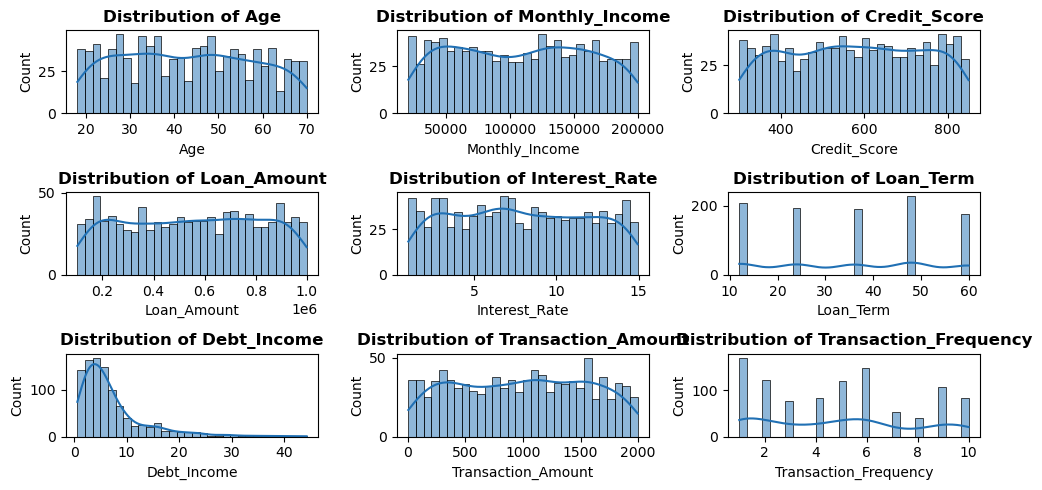

In [71]:
fig = plt.figure(figsize=(10,5))
for col in num_columns:
    ax = fig.add_subplot(3, 3, num_columns.index(col)+1)
    sb.histplot(df[col], bins=30, kde=True, color=sb.color_palette("Blues", 3)[2], ax=ax)
    ax.set_title(f"Distribution of {col}", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### Insight

This histplot displays the distribution of numerical columns. It represents that Age, Monthly Income, Credit Score, Loan Amount, Interest Rate, Loan Term, Transaction Amount, Transaction Frequency are symmetric, whereas Debt_Income tends to be positively skewed.

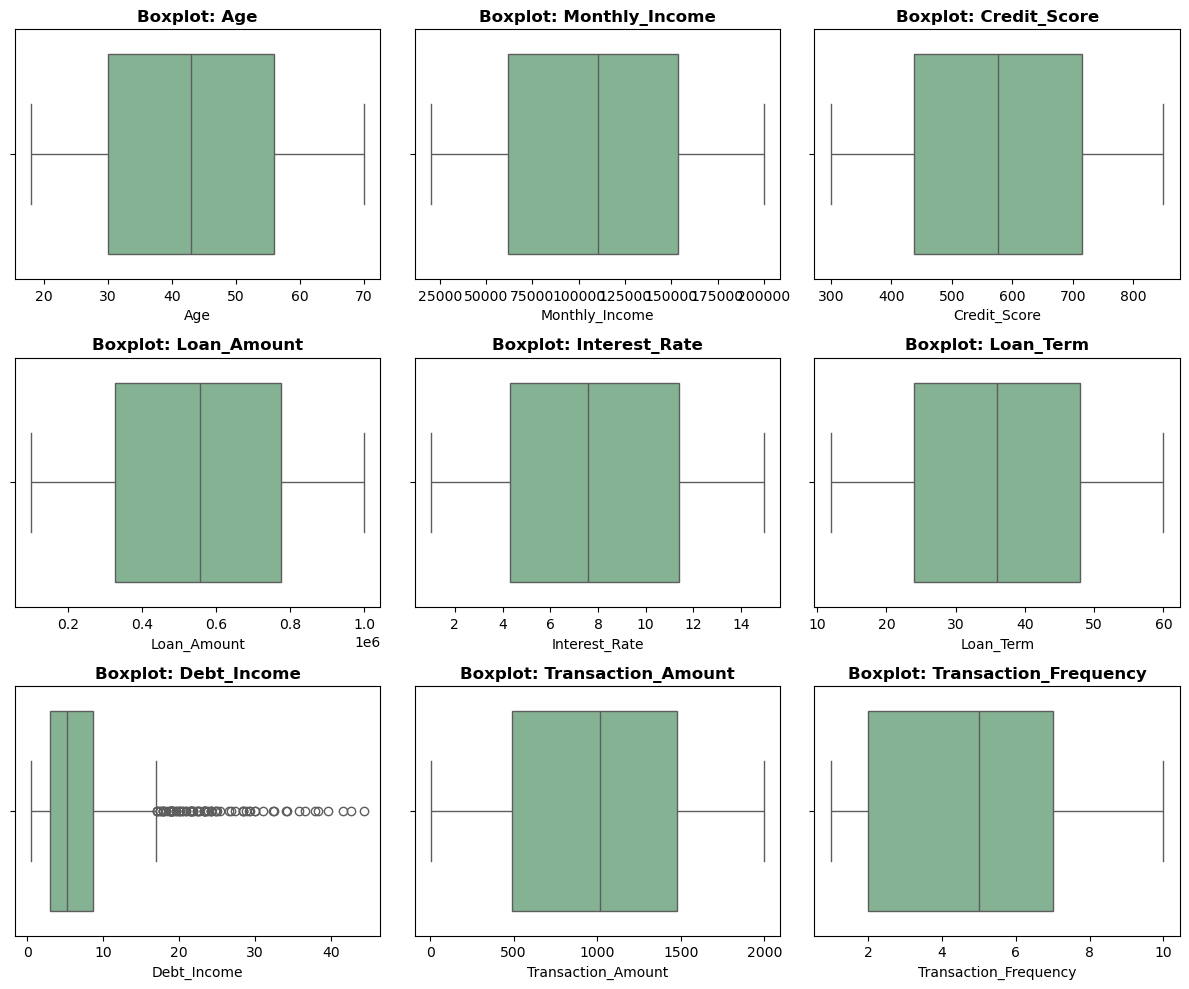

In [75]:
#Boxplot-outlier detection
palette = sb.color_palette("crest")

fig, axes = plt.subplots(3, 3, figsize=(12,10))
axes = axes.flatten()

for ax, column in zip(axes, num_columns):
    sb.boxplot(x=df[column], ax=ax, palette=palette)
    ax.set_title(f"Boxplot: {column}", fontsize=12, fontweight='bold')
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

#### Insight

The Boxplot indicates outlier detection, showing that only the Debt_Income feature displays outliers where all other features appear to be free of outliers.

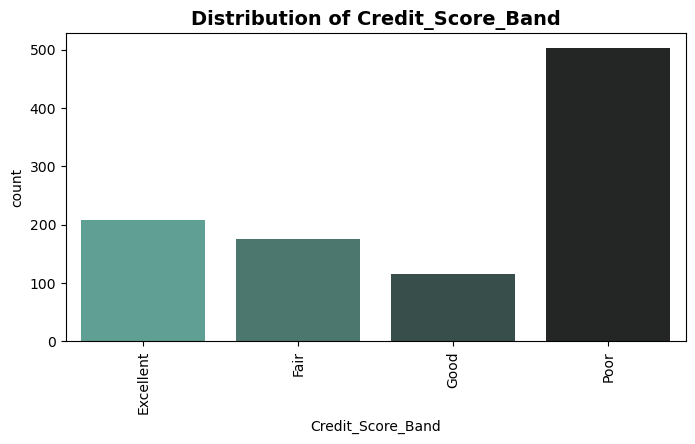

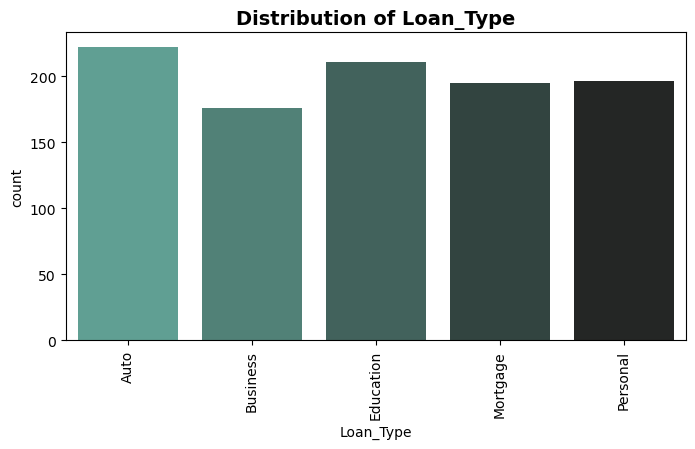

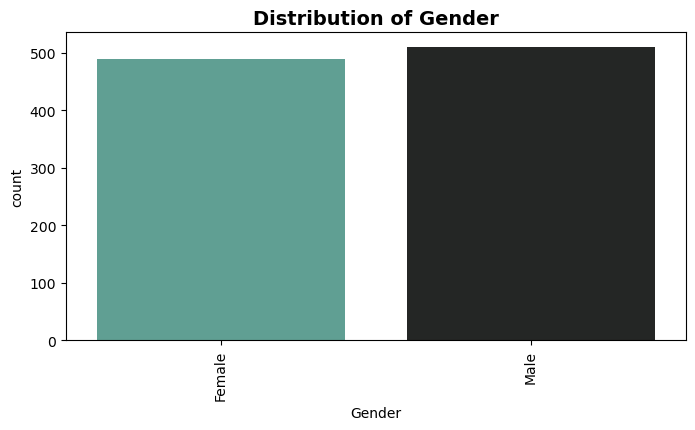

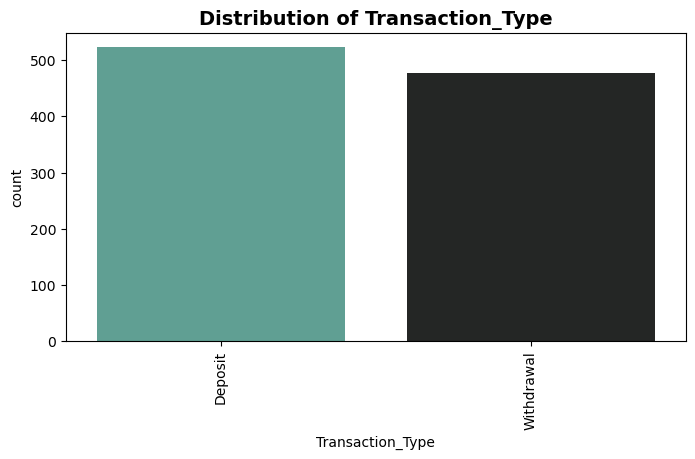

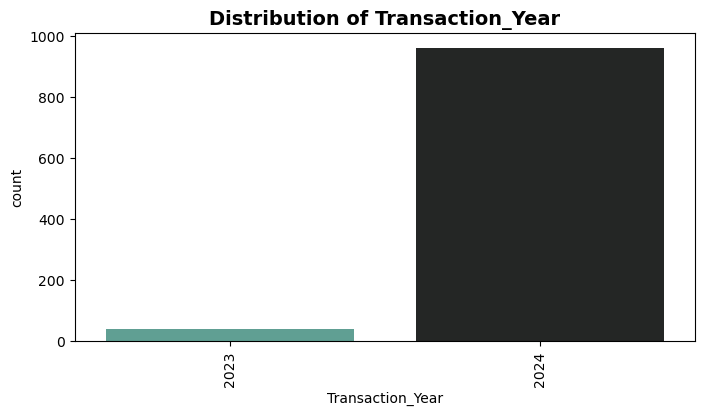

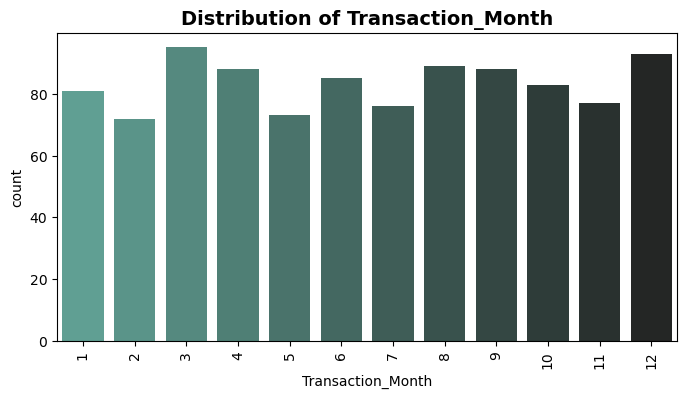

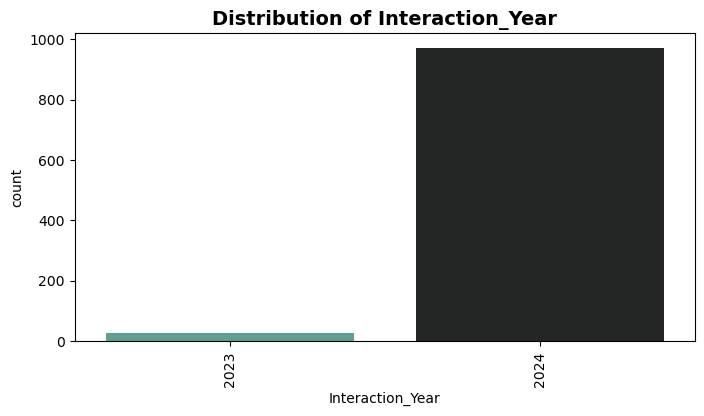

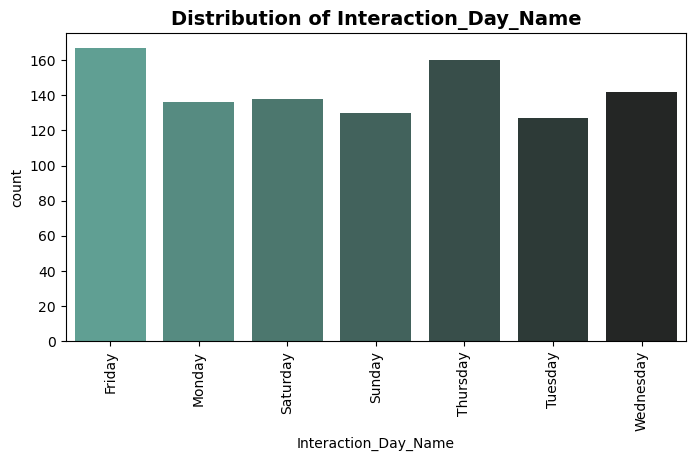

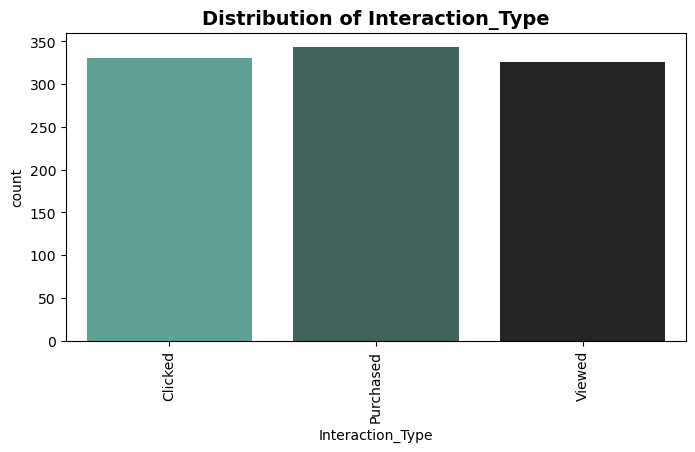

In [81]:
# Categorical variables
import matplotlib.animation as animation
cat_columns = ["Credit_Score_Band", "Loan_Type", "Gender", 
               "Transaction_Type", "Transaction_Year", "Transaction_Month", "Interaction_Year", "Interaction_Day_Name", "Interaction_Type"]
for col in cat_columns:
    plt.figure(figsize=(8, 4))
    ax = sb.countplot(x=col, data=df, palette="dark:#5A9_r")
    ax.set_title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    plt.xticks(rotation=90)

    def update(frame):
        ax.set_facecolor('lightgray')  # Adding fade effect in background

    ani = animation.FuncAnimation(plt.gcf(), update, frames=30, interval=50, repeat=False)
    plt.show()


#### Insight

The countplot displays the distribution of categorical features.
- Countplot for distribution of Credit Score Band:
    The plot displays that most of the customers has Poor credict score band compared to Excellent, Fair, Good.
- Countplot for Distribution of Loan Type:
    The Mortgage loan type has the highest count, followed by Education, Auto, Business and Personal loans.
- Countplot for Distribution of Gender:
    More Males have taken loans compared to females.
- Countplot for Distribution of Transaction Type:
    Most of the transactions were Withdrawals compared to Deposits.
- Countplot for Distribution of Transaction Year:
    2024 has the highest transaction count.
- Countplot for Distribution of Transaction Month:
    July has the highest transaction count compared to other months.
- Countplot for Interaction Year:
    2024 shows high number of interactions than 2023.
- Countplot for Distribution of Interaction Day Name:
    Tuesdays has the highest interaction count than other days.
- Countplot for Distribution of Interaction Type
        The counts for clicked and purchased are higher than for viewed.

In [89]:
num_col=["Age","Monthly_Income","Credit_Score","Loan_Amount","Interest_Rate","Loan_Term","Debt_Income","Transaction_Amount","Repayment_Status","Transaction_Frequency"]

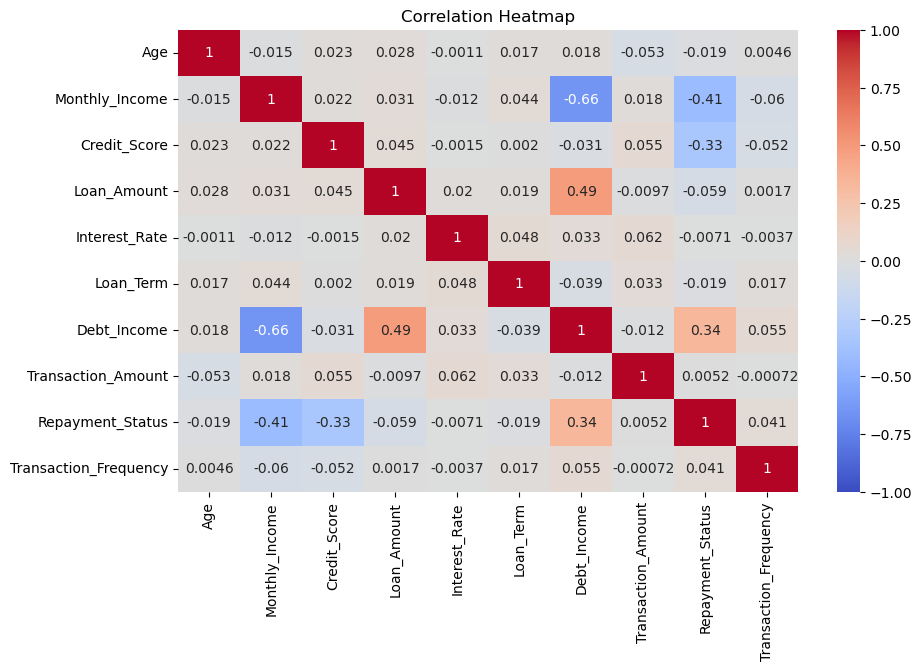

In [93]:
#correlation matrix
co_mat=df[num_col].corr()
plt.figure(figsize=(10, 6))
sb.heatmap(co_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

#### Insight

The heat map displays the relationships between different variables related to loan data. This plot displays that
- The Monthly Income and Debt Income are strong negative correlations.
- The Debt Income and Repayment Status are strong positive correlations.
- The Loan Amount and Debt Income are strong positive correlations.

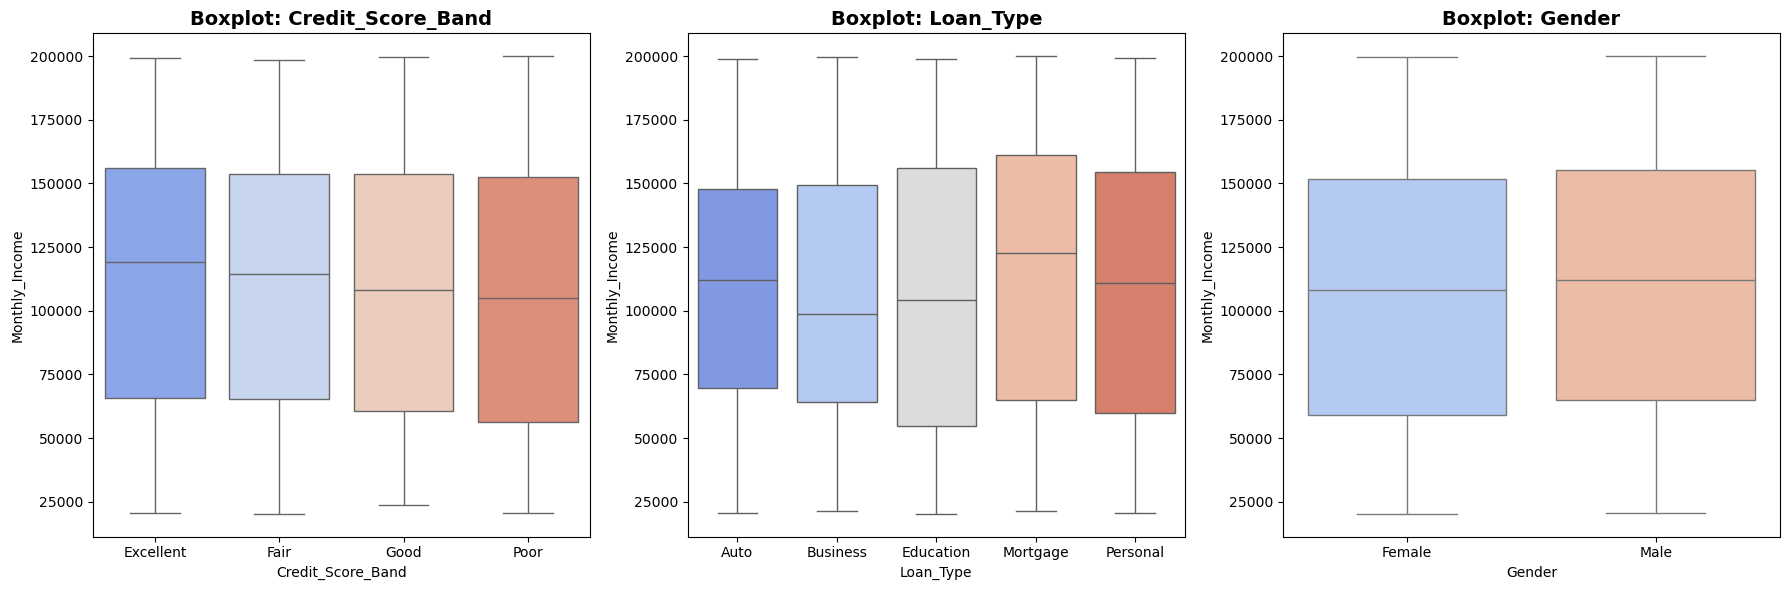

In [97]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

for ax, column in zip(axes, ['Credit_Score_Band', 'Loan_Type', 'Gender']):
    sb.boxplot(x=column, y='Monthly_Income', data=df, ax=ax, palette="coolwarm")
    ax.set_title(f"Boxplot: {column}", fontsize=14, fontweight='bold')
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

#### Insight

- Customers with higher credit scores tend to have higher monthly income regardless of gender or loan type.
- Customers with higher incomes are more likely to have  Mortgage loans.
- Gender has minimal impact on monthly income.

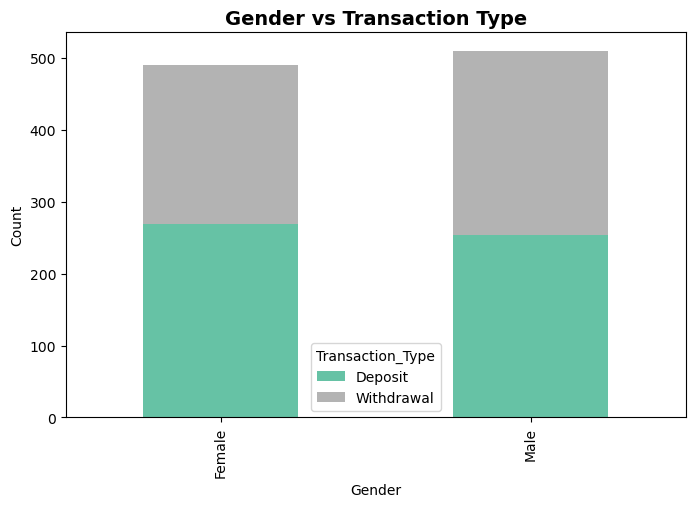

In [101]:
# Crosstab and stacked bar chart for categorical vs categorical
pd.crosstab(df['Gender'], df['Transaction_Type']).plot(kind='bar', figsize=(8, 5), stacked=True, colormap='Set2')
plt.title("Gender vs Transaction Type", fontsize=14, fontweight='bold')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


#### Insight

The crosstab shows the distribution of Transaction Types: 
- Male have a higher count of deposit transactions compared to female.
- Female have a higher count of withdrawal transactions compare to male.

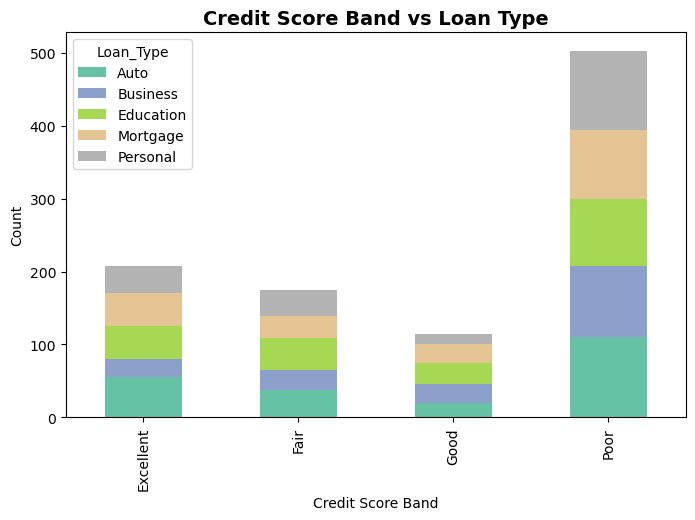

In [105]:
# Crosstab for 'Credit_Score_Band' and 'Loan_Type'
pd.crosstab(df['Credit_Score_Band'], df['Loan_Type']).plot(kind='bar', figsize=(8, 5), stacked=True, colormap='Set2')
plt.title("Credit Score Band vs Loan Type", fontsize=14, fontweight='bold')
plt.xlabel("Credit Score Band")
plt.ylabel("Count")
plt.show()

#### Insight

The crosstab shows the distribution of Loan Types across different Credit Score Brands: 
- Customer with Poor Credit Score Band has the highest overall number of Loans followed by Excellent, Good and Fair.

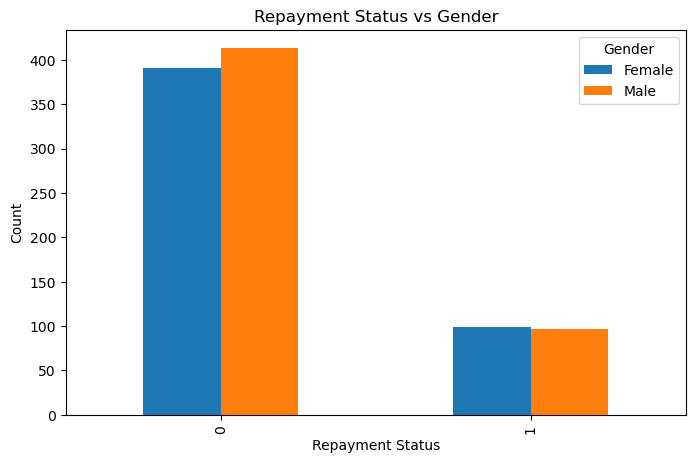

In [109]:
# Crosstab for 'Credit_Score_Band' and 'Loan_Type'
pd.crosstab(df['Repayment_Status'], df['Gender']).plot(kind='bar', figsize=(8, 5))
plt.title("Repayment Status vs Gender")
plt.xlabel("Repayment Status")
plt.ylabel("Count")
plt.show()

#### Insight

The Crosstab displays the distribution of Repayment Status by Gender:
- Both Female and Male have a similar number of individuals with Repayment Status 0.
- Male have a slightly higher proportion of individuals with Repayment Status 1 compared to Female.

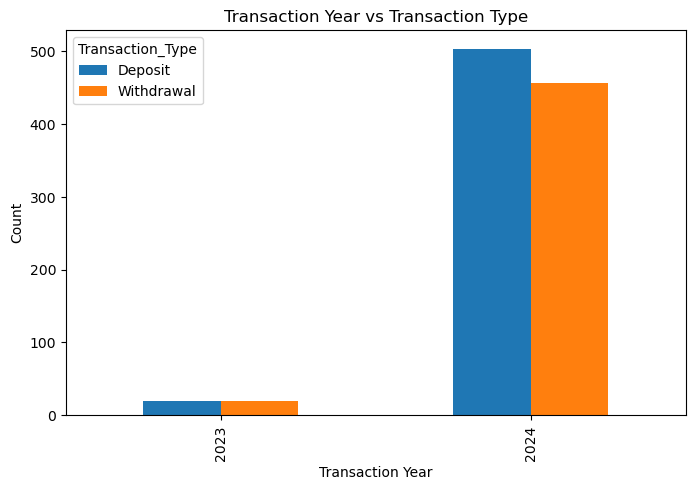

In [113]:
pd.crosstab(df['Transaction_Year'], df['Transaction_Type']).plot(kind='bar', figsize=(8, 5))
plt.title("Transaction Year vs Transaction Type")
plt.xlabel("Transaction Year")
plt.ylabel("Count")
plt.show()

#### Insight

The Crosstab displays the distribution of Transaction Type by Transaction Year:
- In 2024, withdrwal transactions slightly outnumber deposits.
- In 2023, withdrawal exceeds deposits.

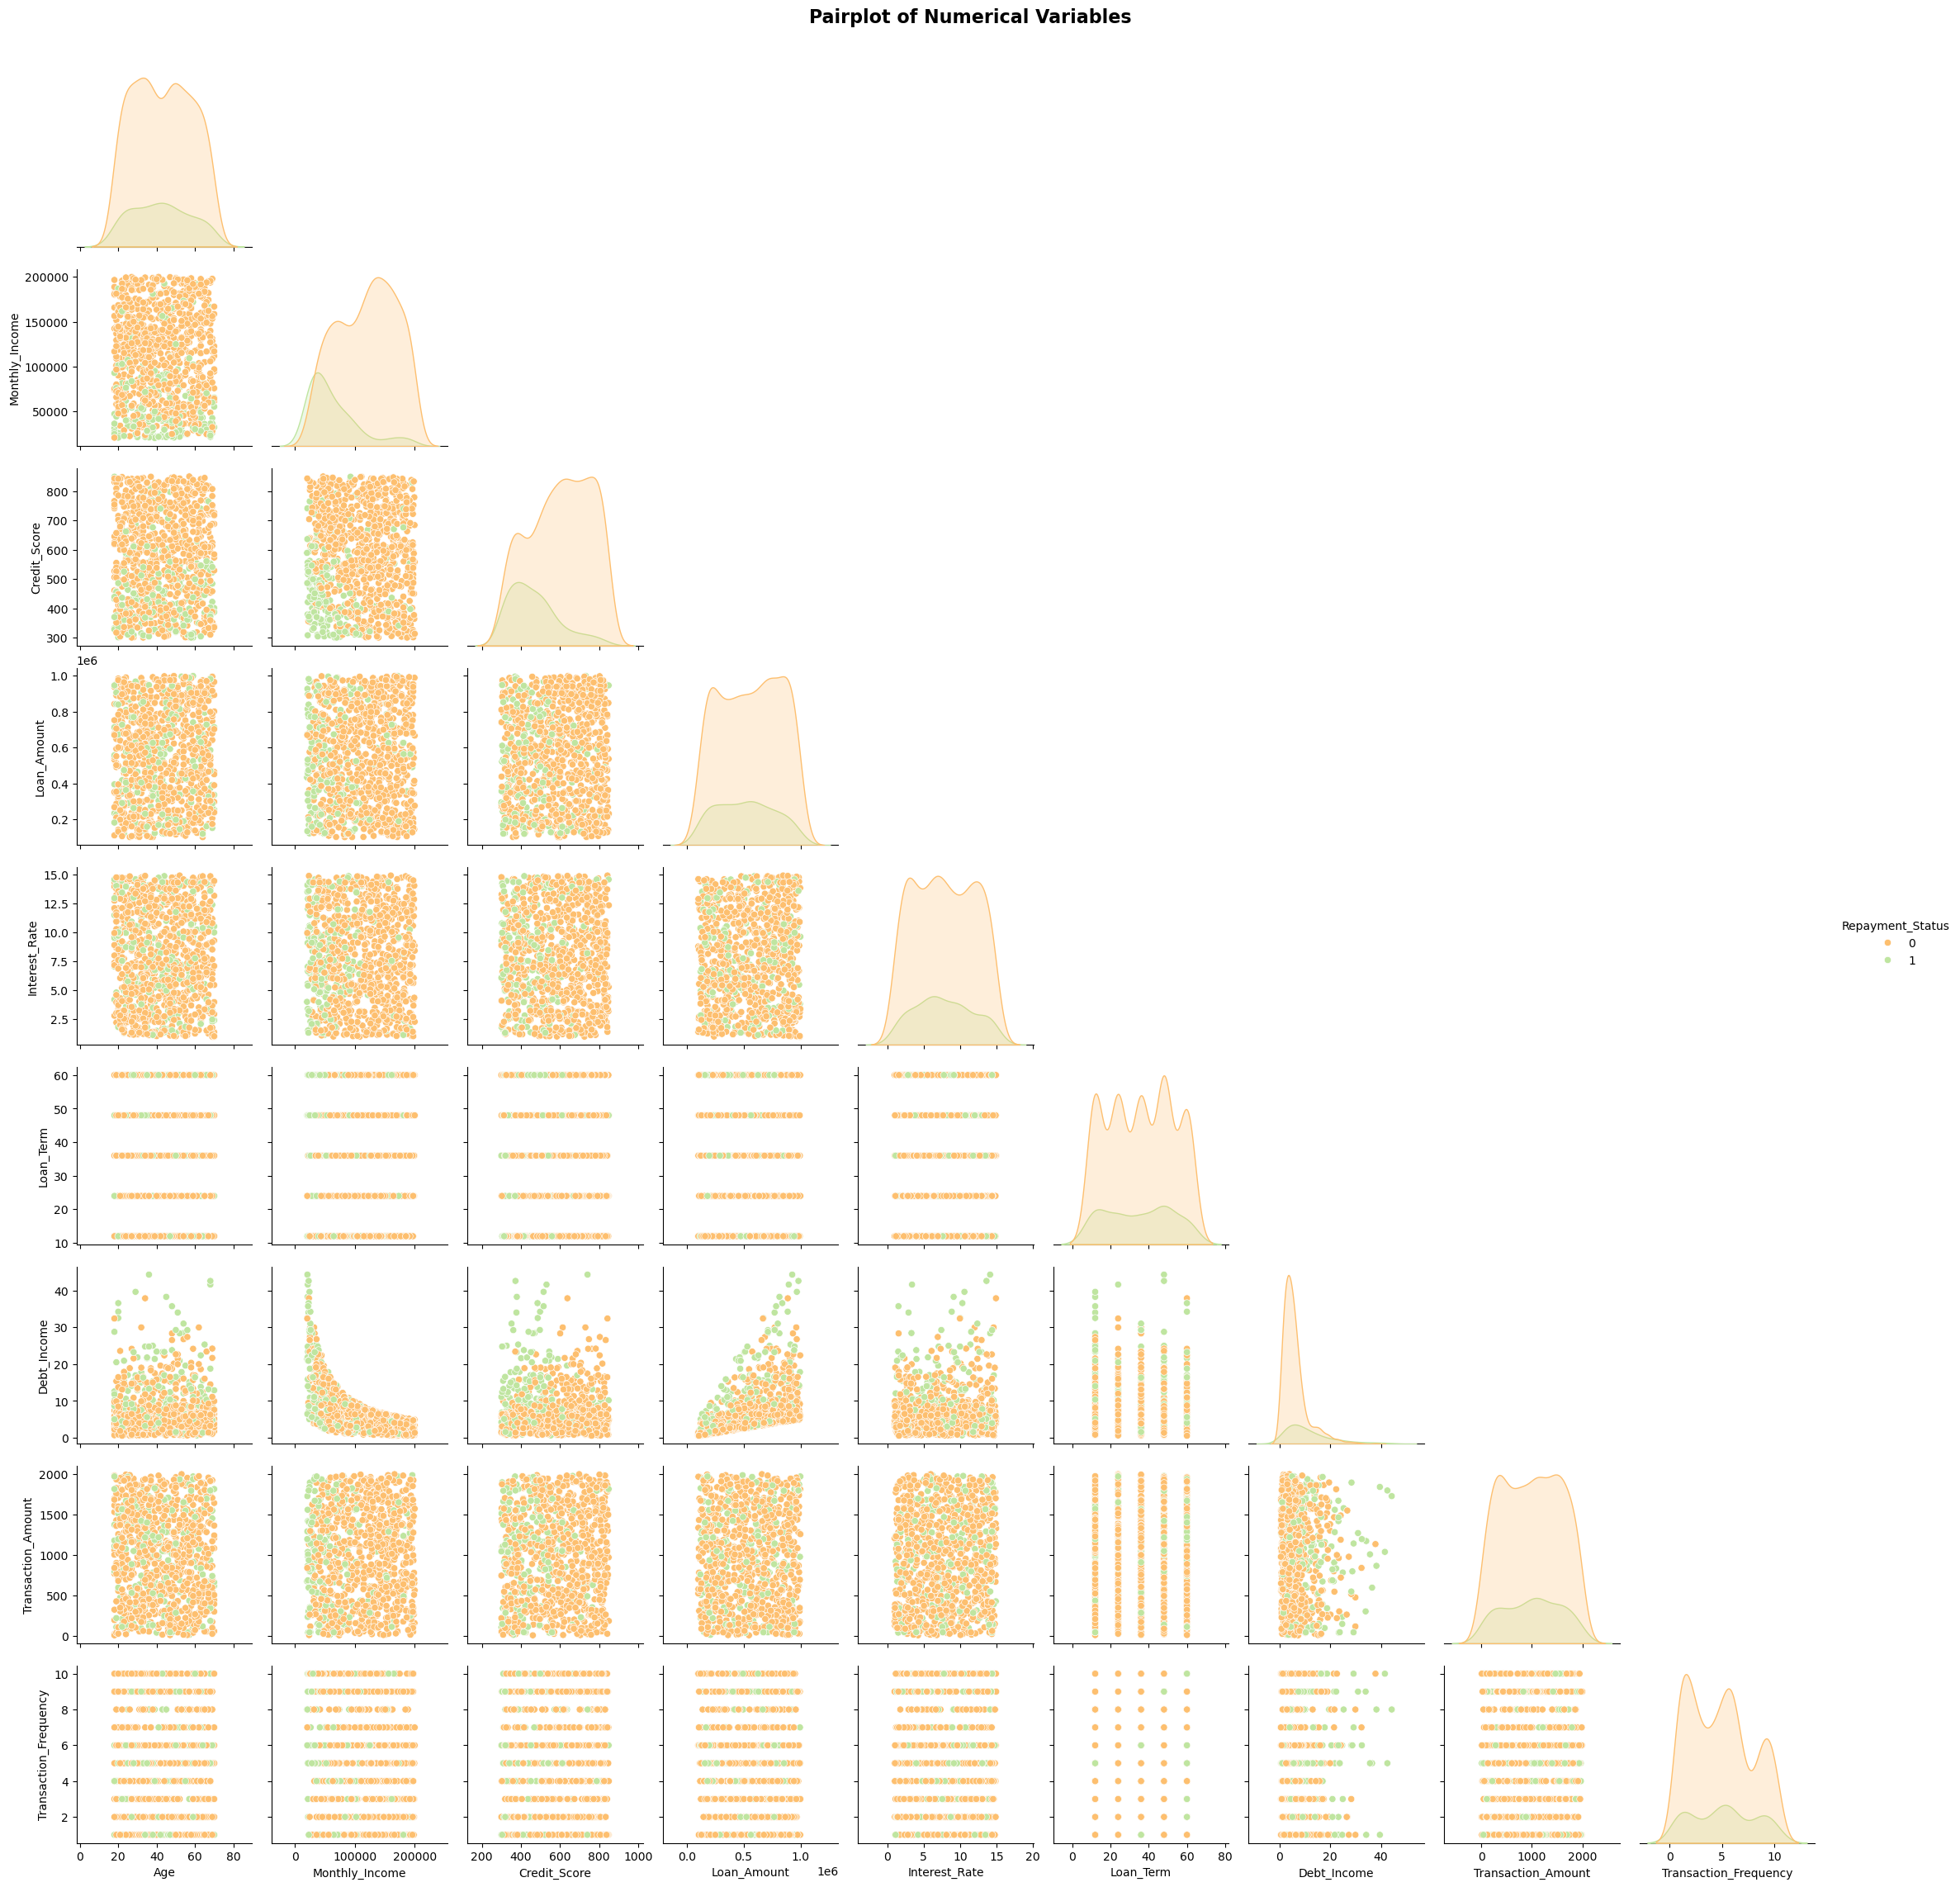

In [119]:
# Use a more vibrant color palette
sb.pairplot(df[num_col], palette="Spectral", hue="Repayment_Status", corner=True)
plt.suptitle('Pairplot of Numerical Variables', y=1.02, fontsize=16, fontweight='bold')
plt.show()

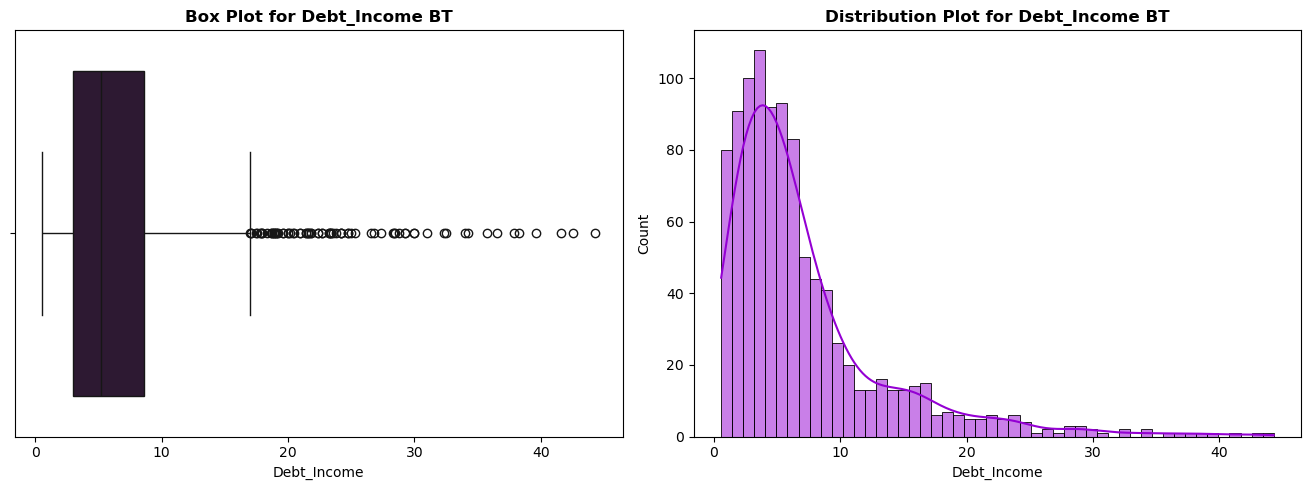

In [121]:
col_to_check_skew=["Debt_Income"]
for i in col_to_check_skew:
    plt.figure(figsize=(20,5))

    plt.subplot(1,3,1)
    sb.boxplot(data=df, x=i, palette="twilight")
    plt.title(f"Box Plot for {i} BT", fontsize=12, fontweight='bold')

    plt.subplot(1,3,2)
    sb.histplot(data=df, x=i, kde=True, bins=50, color="darkviolet")
    plt.title(f"Distribution Plot for {i} BT", fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()



#### Insight

1. Boxplot displays outliers in the Debt Income.
2. Histogram illustrates that the Debt Income is positively skewed.

In [50]:
#function-to check skewness 
def check_skew(df,num_columns):
    skewness_i={}
    for i in num_columns:
        skewness=df[i].skew()
        if skewness>0.5:
            skew_type="Positively Skewed"
        elif skewness<-0.5:
            skew_type="Negatively skewed"
        else:
            skew_type="Symmetric"
        
        skewness_i[i]={
            "skewness_value":skewness,
            "skew Type":skew_type
        }
    return pd.DataFrame(skewness_i)

In [51]:
check_skew(df,num_columns)

,Age,Monthly_Income,Credit_Score,Loan_Amount,Interest_Rate,Loan_Term,Debt_Income,Transaction_Amount,Transaction_Frequency
skewness_value,-0.023832,0.037006,-0.008278,-0.002681,0.015887,0.139561,2.105526,0.087717,0.149121
skew Type,Symmetric,Symmetric,Symmetric,Symmetric,Symmetric,Symmetric,Positively Skewed,Symmetric,Symmetric


#### Insight

Age, Monthly Income, Credit Score, Loan Amount, Interest Rate, Loan Term, Transaction Amount,Transaction Frequency are symmetric, whereas Debt Income is Positively Skewed.

In [53]:
#skewness treatment
df["Debt_To_Income_Log"]=np.log1p(df["Debt_Income"])
df["Debt_To_Income_sqrt"]=np.sqrt(df["Debt_Income"])
df["Debt_To_Income_box_cox"],_=stats.boxcox(df["Debt_Income"]+1)

In [54]:
print("log",df["Debt_To_Income_Log"].skew())
print("sqrt",df["Debt_To_Income_sqrt"].skew())
print("boxcox",df["Debt_To_Income_box_cox"].skew())

log 0.3083452560969581
sqrt 0.9933896459500717
boxcox 0.025392944234890552


In [55]:
df["Debt_To_Income_box_cox"],_=stats.boxcox(df["Debt_Income"]+1)
print("boxcox",df["Debt_To_Income_box_cox"].skew())

boxcox 0.025392944234890552


#### Insight

After skewness treatment, the Box-Cox transformation significantly reduced skewness and resulted in a nearly normal distribution, where as the log and sqrt transformations did not have much impact on reducing skewess.

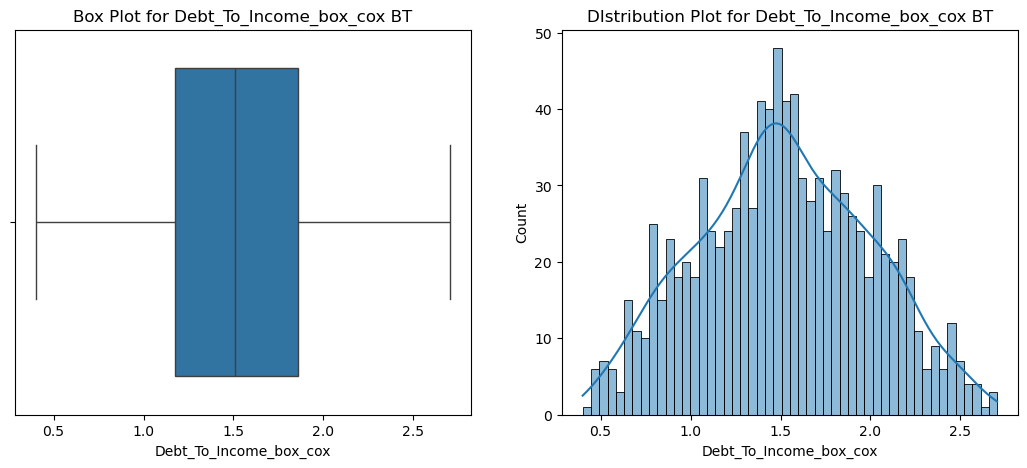

In [57]:
#Plotting after the treatment
treated_skew=["Debt_To_Income_box_cox"]
for i in treated_skew:
        plt.figure(figsize=(20,5))

        plt.subplot(1,3,1)
        sb.boxplot(data=df,x=i)
        plt.title(f"Box Plot for {i} BT")

        plt.subplot(1,3,2)
        sb.histplot(data=df,x=i,kde=True,bins=50)
        plt.title(f"DIstribution Plot for {i} BT")

#### Insight

After the transformations, both outliers and skewness have been addressed.

In [59]:
df1=df.drop(columns=["Customer_Id"])

## MODEL TRAINING AND EVALUATION

## LOAN DEFAULT PREDICTION

### Supervised Learning

### Logistic Regression

In [62]:
#Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

#encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X["Credit_Score_Band"] = le.fit_transform(X["Credit_Score_Band"])
X["Loan_Type"] = le.fit_transform(X["Loan_Type"])
X["Debt_Income_log"]=np.log1p(X["Debt_Income"])
X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

lr_sm=LogisticRegression(random_state=42)
lr_sm.fit(x_smote,y_smote)

y_pred_lr=lr_sm.predict(X_test)

y_pred_lr_proba = lr_sm.predict_proba(X_test)[:, 1]

roc_auc_lr = roc_auc_score(y_test, y_pred_lr_proba)

accuracy_lr=accuracy_score(y_test, y_pred_lr)
precision_scr_lr=precision_score(y_test, y_pred_lr)
recall_scr_lr=recall_score(y_test, y_pred_lr)
f1_scr_lr=f1_score(y_test, y_pred_lr)
roc_auc_lr=roc_auc_lr
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Precision:", precision_score(y_test, y_pred_lr))
print("Logistic Regression Recall:", recall_score(y_test, y_pred_lr))
print("Logistic Regression F1-Score:", f1_score(y_test, y_pred_lr))
print("Logistic Regression ROC-AUC Score:", roc_auc_lr)

Logistic Regression Accuracy: 0.7933333333333333
Logistic Regression Precision: 0.43373493975903615
Logistic Regression Recall: 0.7058823529411765
Logistic Regression F1-Score: 0.5373134328358209
Logistic Regression ROC-AUC Score: 0.8033703441215843


In [63]:
#checking for imbalanced data
y_smote.value_counts()

Repayment_Status
0    575
1    575
Name: count, dtype: int64

In [64]:
#Hyperparameter Tuning for Logistion Regression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.preprocessing import StandardScaler,LabelEncoder

X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

le_credict=LabelEncoder()
X["Credit_Score_Band"] = le_credict.fit_transform(X["Credit_Score_Band"])

le_loan=LabelEncoder()
X["Loan_Type"] = le_loan.fit_transform(X["Loan_Type"])

X["Debt_Income_log"]=np.log1p(X["Debt_Income"])

X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

lr_sm=LogisticRegression(random_state=42)
lr_sm.fit(x_smote,y_smote)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter' : [100, 200, 300]
}

scoring = make_scorer(f1_score)
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid,
    scoring=scoring,
    cv=5,
    n_jobs=-1
)

grid_search.fit(x_smote, y_smote)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_best_proba=best_model.predict_proba(X_test)[:,1]

accuracy_lr_at=accuracy_score(y_test, y_pred_best)
precision_scr_lr_at=precision_score(y_test, y_pred_best)
recall_scr_lr_at=recall_score(y_test, y_pred_best)
f1_score_lr_at=f1_score(y_test, y_pred_best)
roc_auc_lr_at=roc_auc_score(y_test, y_pred_best_proba)
print("Best Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Logistic Regression Precision:", precision_score(y_test, y_pred_best))
print("Best Logistic Regression Recall:", recall_score(y_test, y_pred_best))
print("Best Logistic Regression F1-Score:", f1_score(y_test, y_pred_best))
print("Best Logistic Regression ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_proba))

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.7842762525671356
Best Logistic Regression Accuracy: 0.7866666666666666
Best Logistic Regression Precision: 0.42857142857142855
Best Logistic Regression Recall: 0.7647058823529411
Best Logistic Regression F1-Score: 0.5492957746478874
Best Logistic Regression ROC-AUC Score: 0.8140011024490117


In [65]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[64],
    "Monthly_Income":[78007.72],
    "Credit_Score":[515],
    "Credit_Score_Band":["Poor"],
    "Loan_Amount":[605969.14],
    "Interest_Rate":[11.80],
    "Loan_Term":[36],
    "Loan_Type":["Auto"],
    "Debt_Income":[7.768066]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score", 
    "Credit_Score_Band", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Loan_Type", 
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = lr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [66]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[25],
    "Monthly_Income":[32017.29],
    "Credit_Score":[647],
    "Credit_Score_Band":["Fair"],
    "Loan_Amount":[313237.82],
    "Interest_Rate":[10.65],
    "Loan_Term":[36],
    "Loan_Type":["Auto"],
    "Debt_Income":[9.783396]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score", 
    "Credit_Score_Band", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Loan_Type", 
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = lr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 1


In [67]:
df1.sample(2)

,Age,Monthly_Income,Credit_Score,Credit_Score_Band,Loan_Amount,Interest_Rate,Loan_Term,Loan_Type,Debt_Income,Repayment_Status,...,Product_Id,Product_Name,Interaction_Date,Interaction_Year,Interaction_Day_Name,Interaction_Type,Transaction_Frequency,Debt_To_Income_Log,Debt_To_Income_sqrt,Debt_To_Income_box_cox
68,50,196305.86,637,Fair,204955.54,2.22,60,Mortgage,1.044062,0,...,P027,Holiday Loan,2024-02-27,2024,Tuesday,Viewed,10,0.714939,1.021794,0.668505
371,57,41412.46,521,Poor,748608.28,14.01,24,Auto,18.076885,0,...,P08,Student Loan,2024-01-26,2024,Friday,Viewed,5,2.948477,4.251692,2.257407


### Decision Tree Classifier

In [69]:
#Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

#encoding
le=LabelEncoder()
X["Credit_Score_Band"] = le.fit_transform(X["Credit_Score_Band"])
X["Loan_Type"] = le.fit_transform(X["Loan_Type"])
X["Debt_Income_log"]=np.log1p(X["Debt_Income"])
X = X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

dt_sm=DecisionTreeClassifier(random_state=42)
dt_sm.fit(x_smote,y_smote)

y_pred_dt=dt_sm.predict(X_test)

y_pred_dt_proba= dt_sm.predict_proba(X_test)[:, 1]

roc_auc_dt = roc_auc_score(y_test, y_pred_dt_proba)


accuracy_dt=accuracy_score(y_test, y_pred_dt)
precision_scr_dt=precision_score(y_test, y_pred_dt)
recall_scr_dt=recall_score(y_test, y_pred_dt)
f1_scr_dt=f1_score(y_test, y_pred_dt)
roc_auc_dt=roc_auc_dt
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Precision:", precision_score(y_test, y_pred_dt))
print("Decision Tree Recall:", recall_score(y_test, y_pred_dt))
print("Decision Tree F1-Score:", f1_score(y_test, y_pred_dt))
print("Decision Tree Classifier ROC-AUC Score:", roc_auc_dt)

Decision Tree Accuracy: 0.7833333333333333
Decision Tree Precision: 0.390625
Decision Tree Recall: 0.49019607843137253
Decision Tree F1-Score: 0.43478260869565216
Decision Tree Classifier ROC-AUC Score: 0.6667847862036381


In [70]:
#Hyperparameter Tunin for Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

#encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X["Credit_Score_Band"] = le.fit_transform(X["Credit_Score_Band"])
X["Loan_Type"] = le.fit_transform(X["Loan_Type"])
X["Debt_Income_log"]=np.log1p(X["Debt_Income"])

X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

dt_sm=DecisionTreeClassifier(random_state=42)
dt_sm.fit(x_smote,y_smote)

param_grid_dt={
    "max_depth":[5, 10, 15, 20, 25],
    "min_samples_split":[2, 5, 10, 20],
    "min_samples_leaf":[1, 2, 5, 10],
    "criterion":["gini","entropy"]
}

scoring=make_scorer(f1_score)

grid_search_dt=GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                            param_grid=param_grid_dt,
                            scoring=scoring,
                            cv=5)

grid_search_dt.fit(x_smote,y_smote)

print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best F1-Score:", grid_search_dt.best_score_)

best_dt_model=grid_search_dt.best_estimator_

y_pred_best_dt=best_dt_model.predict(X_test)
y_pred_best_dt_proba = best_dt_model.predict_proba(X_test)[:, 1]

accuracy_dt_at=accuracy_score(y_test, y_pred_best_dt)
precision_scr_dt_at=precision_score(y_test, y_pred_best_dt)
recall_scr_dt_at=recall_score(y_test, y_pred_best_dt)
f1_score_dt_at=f1_score(y_test, y_pred_best_dt)
roc_auc_dt_at=roc_auc_score(y_test, y_pred_best_dt_proba)
print("Best Decision Tree Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("Best Decision Tree Precision:", precision_score(y_test, y_pred_best_dt))
print("Best Decision Tree Recall:", recall_score(y_test, y_pred_best_dt))
print("Best Decision Tree F1-Score:", f1_score(y_test, y_pred_best_dt))
print("Best Decision Tree ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_dt_proba))

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1-Score: 0.8236930627644634
Best Decision Tree Accuracy: 0.7833333333333333
Best Decision Tree Precision: 0.38333333333333336
Best Decision Tree Recall: 0.45098039215686275
Best Decision Tree F1-Score: 0.4144144144144144
Best Decision Tree ROC-AUC Score: 0.6511930073234113


In [71]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[64],
    "Monthly_Income":[78007.72],
    "Credit_Score":[515],
    "Credit_Score_Band":["Poor"],
    "Loan_Amount":[605969.14],
    "Interest_Rate":[11.80],
    "Loan_Term":[36],
    "Loan_Type":["Auto"],
    "Debt_Income":[7.768066]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score", 
    "Credit_Score_Band", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Loan_Type", 
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = lr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [72]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[25],
    "Monthly_Income":[32017.29],
    "Credit_Score":[647],
    "Credit_Score_Band":["Fair"],
    "Loan_Amount":[313237.82],
    "Interest_Rate":[10.65],
    "Loan_Term":[36],
    "Loan_Type":["Auto"],
    "Debt_Income":[9.783396]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score", 
    "Credit_Score_Band", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Loan_Type", 
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = lr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 1


### Random Forest Classifier

In [74]:
#Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

le_credict=LabelEncoder()
X["Credit_Score_Band"] = le_credict.fit_transform(X["Credit_Score_Band"])

le_loan=LabelEncoder()
X["Loan_Type"] = le_loan.fit_transform(X["Loan_Type"])

X["Debt_Income_log"]=np.log1p(X["Debt_Income"])

X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

rfr_sm=RandomForestClassifier(random_state=42)
rfr_sm.fit(x_smote,y_smote)

y_pred_rfr=rfr_sm.predict(X_test)

y_pred_rfr_proba = rfr_sm.predict_proba(X_test)[:, 1]

accuracy_rf=accuracy_score(y_test, y_pred_rfr)
precision_scr_rf=precision_score(y_test, y_pred_rfr)
recall_scr_rf=recall_score(y_test, y_pred_rfr)
f1_scr_rf=f1_score(y_test, y_pred_rfr)
roc_auc_rf=roc_auc_score(y_test, y_pred_rfr_proba)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rfr))
print("Random Forest Precision:", precision_score(y_test, y_pred_rfr))
print("Random Forest Recall:", recall_score(y_test, y_pred_rfr))
print("Random Forest F1-Score:", f1_score(y_test, y_pred_rfr))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_pred_rfr_proba))

Random Forest Accuracy: 0.84
Random Forest Precision: 0.5384615384615384
Random Forest Recall: 0.4117647058823529
Random Forest F1-Score: 0.4666666666666667
Random Forest ROC-AUC: 0.7959288132923852


In [75]:
df1.sample(2)

,Age,Monthly_Income,Credit_Score,Credit_Score_Band,Loan_Amount,Interest_Rate,Loan_Term,Loan_Type,Debt_Income,Repayment_Status,...,Product_Id,Product_Name,Interaction_Date,Interaction_Year,Interaction_Day_Name,Interaction_Type,Transaction_Frequency,Debt_To_Income_Log,Debt_To_Income_sqrt,Debt_To_Income_box_cox
189,40,104839.5,703,Good,139325.10,2.41,36,Personal,1.328937,0,...,P024,Travel Loan,2024-01-08,2024,Monday,Clicked,10,0.845412,1.152795,0.781005
941,56,189663.3,492,Poor,194519.81,13.48,60,Business,1.025606,0,...,P018,Auto Refinance,2024-10-25,2024,Friday,Viewed,5,0.705869,1.012722,0.660580


In [76]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[53],
    "Monthly_Income":[128625.23],
    "Credit_Score":[810],
    "Credit_Score_Band":["Excellent"],
    "Loan_Amount":[679786.33],
    "Interest_Rate":[11.20],
    "Loan_Term":[36],
    "Loan_Type":["Mortgage"],
    "Debt_Income":[5.285015]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score", 
    "Credit_Score_Band", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Loan_Type", 
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = rfr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [77]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[39],
    "Monthly_Income":[66693.45],
    "Credit_Score":[516],
    "Credit_Score_Band":["Poor"],
    "Loan_Amount":[457037.09],
    "Interest_Rate":[3.39],
    "Loan_Term":[12],
    "Loan_Type":["Auto"],
    "Debt_Income":[6.852803]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score", 
    "Credit_Score_Band", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Loan_Type", 
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = rfr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [78]:
#Hyperparameter Tuning For Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

#encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X["Credit_Score_Band"] = le.fit_transform(X["Credit_Score_Band"])
X["Loan_Type"] = le.fit_transform(X["Loan_Type"])
X["Debt_Income_log"]=np.log1p(X["Debt_Income"])
X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

rfr_sm=RandomForestClassifier(random_state=42)
rfr_sm.fit(x_smote,y_smote)

param_grid_rf={
    "n_estimators": [100, 200, 300],
    "max_depth":[5, 10, 15, 20, 25],
    "min_samples_split":[2, 5, 10, 20],
    "min_samples_leaf":[1, 2, 5, 10],
    "criterion":["gini","entropy"]
}

scoring=make_scorer(f1_score)

grid_search_rf=GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                            param_grid=param_grid_rf,
                            scoring=scoring,
                            cv=5)

grid_search_rf.fit(x_smote,y_smote)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best F1-Score:", grid_search_rf.best_score_)

best_rf_model=grid_search_rf.best_estimator_

y_pred_best_rf=best_rf_model.predict(X_test)
y_pred_best_rf_proba = best_rf_model.predict_proba(X_test)[:, 1]

accuracy_rf_at=accuracy_score(y_test, y_pred_best_rf)
precision_scr_rf_at=precision_score(y_test, y_pred_best_rf)
recall_scr_rf_at=recall_score(y_test, y_pred_best_rf)
f1_score_rf_at=f1_score(y_test, y_pred_best_rf)
roc_auc_rf_at=roc_auc_score(y_test, y_pred_best_rf_proba)
print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Best Random Forest Precision:", precision_score(y_test, y_pred_best_rf))
print("Best Random Forest Recall:", recall_score(y_test, y_pred_best_rf))
print("Best Random Forest F1-Score:", f1_score(y_test, y_pred_best_rf))
print("Best Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_rf_proba))

Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best F1-Score: 0.8921211603873667
Best Random Forest Accuracy: 0.83
Best Random Forest Precision: 0.5
Best Random Forest Recall: 0.43137254901960786
Best Random Forest F1-Score: 0.4631578947368421
Best Random Forest ROC-AUC Score: 0.7836837546263485


### Gradient Boosting Classifier

In [80]:
#Gradient Boosting Classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

le_credict=LabelEncoder()
X["Credit_Score_Band"] = le_credict.fit_transform(X["Credit_Score_Band"])

le_loan=LabelEncoder()
X["Loan_Type"] = le_loan.fit_transform(X["Loan_Type"])

X["Debt_Income_log"]=np.log1p(X["Debt_Income"])

X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

gb_sm=GradientBoostingClassifier(random_state=42)
gb_sm.fit(x_smote,y_smote)

y_pred_gb=gb_sm.predict(X_test)

y_pred_prob_gbb = gb_sm.predict_proba(X_test)[:, 1]

accuracy_gb=accuracy_score(y_test, y_pred_gb)
precision_scr_gb=precision_score(y_test, y_pred_gb)
recall_scr_gb=recall_score(y_test, y_pred_gb)
f1_scr_gb=f1_score(y_test, y_pred_gb)
roc_auc_gb=roc_auc_score(y_test, y_pred_prob_gbb)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Precision:", precision_score(y_test, y_pred_gb))
print("Gradient Boosting Recall:", recall_score(y_test, y_pred_gb))
print("Gradient Boosting F1-Score:", f1_score(y_test, y_pred_gb))
print("Gradient Boosting ROC-AUC:", roc_auc_score(y_test, y_pred_prob_gbb))

Gradient Boosting Accuracy: 0.8433333333333334
Gradient Boosting Precision: 0.5434782608695652
Gradient Boosting Recall: 0.49019607843137253
Gradient Boosting F1-Score: 0.5154639175257731
Gradient Boosting ROC-AUC: 0.7990392944326324


In [81]:
#Hyperparameter Tuning for Gradient Boosting Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

#encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X["Credit_Score_Band"] = le.fit_transform(X["Credit_Score_Band"])
X["Loan_Type"] = le.fit_transform(X["Loan_Type"])

X["Debt_Income_log"]=np.log1p(X["Debt_Income"])

X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

gb_sm=GradientBoostingClassifier(random_state=42)
gb_sm.fit(x_smote,y_smote)

param_grid_gb={
    "max_depth":[2,3,4],
    "learning_rate":[0.05,0.1],
    "n_estimators":[100,200],
    "subsample": [0.8, 1.0],
    "min_samples_split": [2, 5]
}

scoring=make_scorer(f1_score)

grid_search_gb=GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                            param_grid=param_grid_gb,
                            scoring=scoring,
                            cv=5)

grid_search_gb.fit(x_smote,y_smote)

print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best F1-Score:", grid_search_gb.best_score_)

best_gb_model=grid_search_gb.best_estimator_

y_pred_best_gb=best_gb_model.predict(X_test)
y_pred_best_gb_proba = best_gb_model.predict_proba(X_test)[:, 1]

accuracy_gb_at=accuracy_score(y_test, y_pred_best_gb)
precision_scr_gb_at=precision_score(y_test, y_pred_best_gb)
recall_scr_gb_at=recall_score(y_test, y_pred_best_gb)
f1_score_gb_at=f1_score(y_test, y_pred_best_gb)
roc_auc_gb_at=roc_auc_score(y_test, y_pred_best_gb_proba)
print("Best Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_best_gb))
print("Best Gradient Boosting Precision:", precision_score(y_test, y_pred_best_gb))
print("Best Gradient Boosting Recall:", recall_score(y_test, y_pred_best_gb))
print("Best Gradient Boosting F1-Score:", f1_score(y_test, y_pred_best_gb))
print("Best Gradient Boosting ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_gb_proba))

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
Best F1-Score: 0.9011455357913855
Best Gradient Boosting Accuracy: 0.85
Best Gradient Boosting Precision: 0.575
Best Gradient Boosting Recall: 0.45098039215686275
Best Gradient Boosting F1-Score: 0.5054945054945055
Best Gradient Boosting ROC-AUC Score: 0.7842349791322152


In [82]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[53],
    "Monthly_Income":[128625.23],
    "Credit_Score":[810],
    "Credit_Score_Band":["Excellent"],
    "Loan_Amount":[679786.33],
    "Interest_Rate":[11.20],
    "Loan_Term":[36],
    "Loan_Type":["Mortgage"],
    "Debt_Income":[5.285015]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score", 
    "Credit_Score_Band", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Loan_Type", 
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = rfr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [83]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[53],
    "Monthly_Income":[128625.23],
    "Credit_Score":[810],
    "Credit_Score_Band":["Excellent"],
    "Loan_Amount":[679786.33],
    "Interest_Rate":[11.20],
    "Loan_Term":[36],
    "Loan_Type":["Mortgage"],
    "Debt_Income":[5.285015]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score", 
    "Credit_Score_Band", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Loan_Type", 
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = rfr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


### Model Accuracy Comparison: Before and After Tuning

In [85]:
models=pd.DataFrame({
    "Model":["Logistic Regression","Decision TreeClassifier","Random Forest Classifier","Gradient Boosting Classifier"],

    "Accuracy":[accuracy_lr,accuracy_dt,accuracy_rf,accuracy_gb],

    "Accuracy after Tuning":[accuracy_lr_at,accuracy_dt_at,accuracy_rf_at,accuracy_gb_at]
})
models

,Model,Accuracy,Accuracy after Tuning
0,Logistic Regression,0.793333,0.786667
1,Decision TreeClassifier,0.783333,0.783333
2,Random Forest Classifier,0.840000,0.830000
3,Gradient Boosting Classifier,0.843333,0.850000


#### Insight

Based on the comparison, the Random Forest Classifier has the highest accuracy at approximately 84%, indicating that it is the best-trained model compared to others.

In [87]:
#saving the Random Forest Classifier model using pickle, as it shows the highest accuracy
import pickle

with open("/Users/nandhinichandran/Downloads/Finalproject/rf_cl.pkl","wb") as f:
    pickle.dump(rfr_sm,f)

with open("/Users/nandhinichandran/Downloads/Finalproject/l_e_credict.pkl","wb") as f:
    pickle.dump(le_credict,f)

with open("/Users/nandhinichandran/Downloads/Finalproject/l_e_loan.pkl","wb") as f:
    pickle.dump(le_loan,f)

with open("/Users/nandhinichandran/Downloads/Finalproject/scaler.pkl","wb") as f:
    pickle.dump(scaler,f)


## CUSTOMER SEGMENTATION

### Unsupervised Learning

In [89]:
df

,Customer_Id,Age,Monthly_Income,Credit_Score,Credit_Score_Band,Loan_Amount,Interest_Rate,Loan_Term,Loan_Type,Debt_Income,...,Product_Id,Product_Name,Interaction_Date,Interaction_Year,Interaction_Day_Name,Interaction_Type,Transaction_Frequency,Debt_To_Income_Log,Debt_To_Income_sqrt,Debt_To_Income_box_cox
0,C085,65,107323.15,339,Poor,908926.89,2.96,24,Auto,8.469066,...,P025,Medical Loan,2024-01-04,2024,Thursday,Clicked,4,2.248030,2.910166,1.829558
1,C019,53,122667.29,423,Poor,333271.96,12.73,24,Education,2.716877,...,P024,Travel Loan,2024-06-27,2024,Thursday,Viewed,8,1.312884,1.648295,1.161938
2,C067,47,98439.89,600,Fair,988330.43,3.95,48,Auto,10.039938,...,P07,Business Loan,2024-07-09,2024,Tuesday,Purchased,7,2.401519,3.168586,1.928243
3,C017,55,104372.89,717,Good,671415.41,11.02,36,Mortgage,6.432853,...,P015,Home Equity Line,2024-12-18,2024,Wednesday,Viewed,5,2.005910,2.536307,1.667915
4,C033,52,106886.83,849,Excellent,693775.28,6.87,36,Business,6.490746,...,P027,Holiday Loan,2024-03-10,2024,Sunday,Purchased,4,2.013668,2.547694,1.673211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C060,28,192966.43,676,Good,607678.16,12.52,24,Mortgage,3.149139,...,P010,Retirement Plan,2024-10-20,2024,Sunday,Clicked,10,1.422901,1.774581,1.246776
996,C032,70,66389.76,508,Poor,668887.92,12.59,60,Business,10.075167,...,P044,Insurance Savings,2024-06-01,2024,Saturday,Clicked,1,2.404705,3.174140,1.930262
997,C093,48,68893.86,575,Poor,940701.75,5.08,36,Personal,13.654363,...,P016,Mortgage Refinance,2024-05-24,2024,Friday,Clicked,10,2.684738,3.695181,2.102953
998,C076,54,113645.07,684,Good,335114.93,3.99,36,Personal,2.948785,...,P037,Fixed Deposit,2024-02-18,2024,Sunday,Clicked,7,1.373408,1.717203,1.208829


Silhouette Score for kmeans: 0.36721831698955143
Davies-Bouldin Index for kmeans: 0.8679723314112625


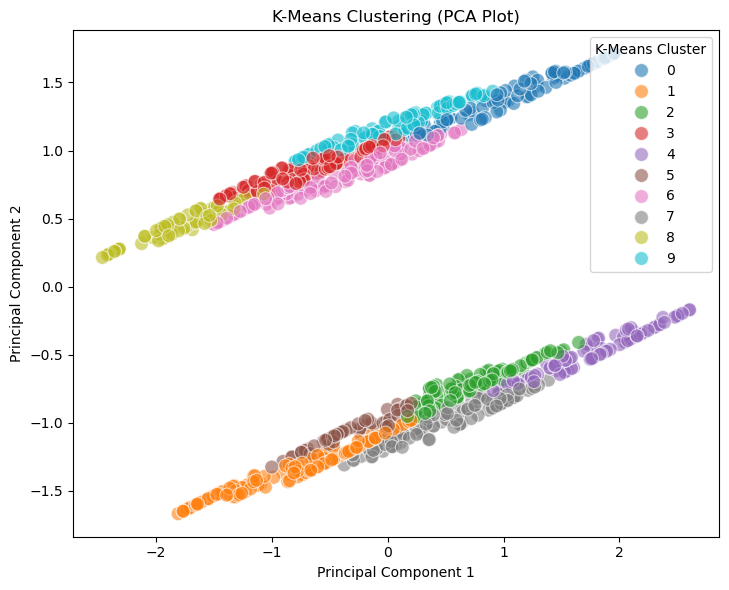

<Axes: xlabel='KMeans_Cluster', ylabel='count'>

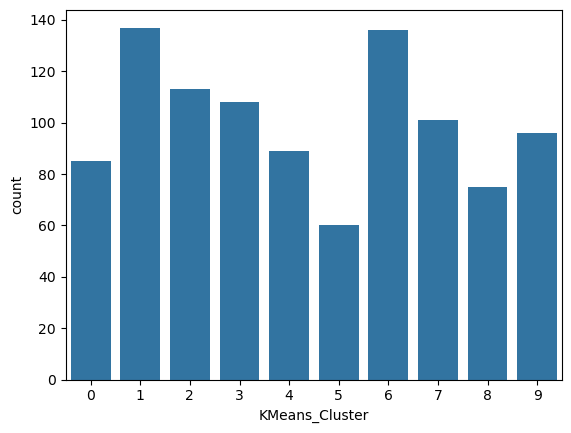

In [90]:
#Kmeans Clustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pickle

l_e_t_t = LabelEncoder()

df["Transaction_Type_Encoded"] = l_e_t_t.fit_transform(df["Transaction_Type"])

feature = df[["Transaction_Amount", "Transaction_Frequency", "Transaction_Type_Encoded"]]

scaler_kmean = StandardScaler()
f_s = scaler_kmean.fit_transform(feature)

kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42)
k_means_clusters = kmeans.fit_predict(f_s)
df['KMeans_Cluster'] = k_means_clusters

silhouette_avg_kmeans = silhouette_score(f_s, k_means_clusters)
dbi_kmeans = davies_bouldin_score(f_s, k_means_clusters)

print(f'Silhouette Score for kmeans: {silhouette_avg_kmeans}')
print(f'Davies-Bouldin Index for kmeans: {dbi_kmeans}')

pca = PCA(n_components=2)
X_pca = pca.fit_transform(f_s)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sb.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['KMeans_Cluster'], palette='tab10', s=100, alpha=0.6)
plt.title('K-Means Clustering (PCA Plot)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='K-Means Cluster')
plt.tight_layout()
plt.show()

sb.countplot(x="KMeans_Cluster", data=df)

In [91]:
# Save models
with open('/Users/nandhinichandran/Downloads/Finalproject/scaler_kmean.pkl', 'wb') as f:
    pickle.dump(scaler_kmean, f)
with open('/Users/nandhinichandran/Downloads/Finalproject/kmeans.pkl', 'wb') as f:
    pickle.dump(kmeans, f)
with open('/Users/nandhinichandran/Downloads/Finalproject/l_e_t_t.pkl', 'wb') as f:
    pickle.dump(l_e_t_t, f)

def predict_cluster(transaction_amount, transaction_frequency, transaction_type, scaler, kmeans, l_e_t_t):
    encoded_transaction_type = l_e_t_t.transform([transaction_type])[0]

    input_data = np.array([[transaction_amount, transaction_frequency, encoded_transaction_type]])

    scaled_input_data = scaler_kmean.transform(input_data)
    
    cluster = kmeans.predict(scaled_input_data)
    
    return cluster[0]

Transaction_Amount = 145.79
Transaction_Frequency = 7
Transaction_Type = "Withdrawal"
predicted_cluster = predict_cluster(Transaction_Amount, Transaction_Frequency, Transaction_Type, scaler_kmean, kmeans, l_e_t_t)
print(f"The input data belongs to Cluster {predicted_cluster}")

The input data belongs to Cluster 6


In [92]:
df[["Customer_Id","Transaction_Frequency","Transaction_Amount","Transaction_Type","KMeans_Cluster"]]

,Customer_Id,Transaction_Frequency,Transaction_Amount,Transaction_Type,KMeans_Cluster
0,C085,4,491.91,Deposit,1
1,C019,8,1300.35,Withdrawal,0
2,C067,7,603.80,Withdrawal,6
3,C017,5,233.79,Withdrawal,6
4,C033,4,1994.10,Withdrawal,9
...,...,...,...,...,...
995,C060,10,374.29,Withdrawal,6
996,C032,1,167.24,Deposit,1
997,C093,10,1592.34,Deposit,4
998,C076,7,842.90,Withdrawal,6


Silhouette Score for dbscan: 0.35358356398409374
Davies-Bouldin Index for dbscan: 1.3126024164506935


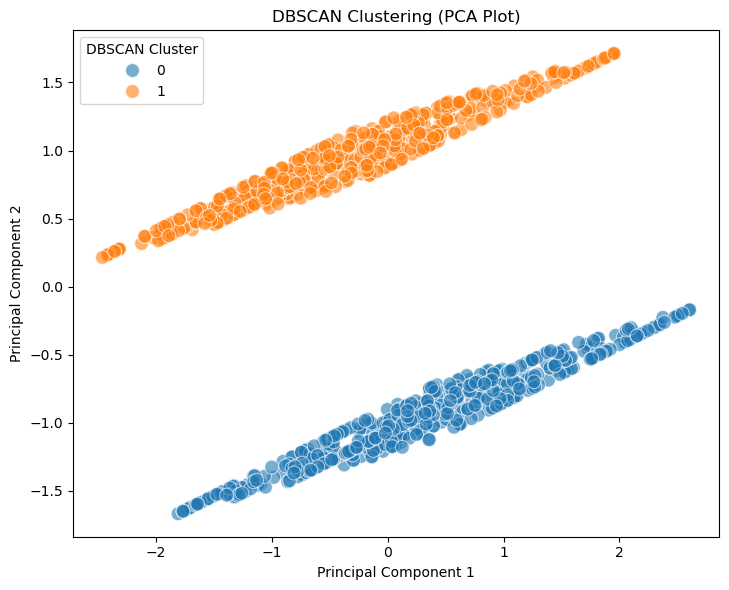

<Axes: xlabel='DBSCAN_Cluster', ylabel='count'>

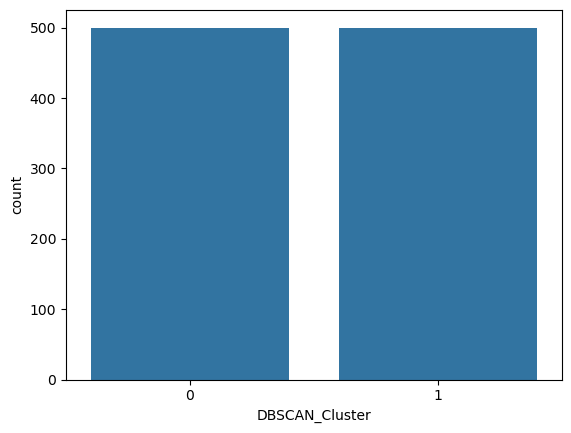

In [93]:
#Kmeans Clustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

l_e_t_t = LabelEncoder()

df["Transaction_Type_Encoded"] = l_e_t_t.fit_transform(df["Transaction_Type"])

feature = df[["Transaction_Amount", "Transaction_Frequency", "Transaction_Type_Encoded"]]

scaler_dbscan = StandardScaler()
f_s = scaler_dbscan.fit_transform(feature)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(f_s)
df['DBSCAN_Cluster'] = dbscan_clusters

if len(set(dbscan_clusters))>1:
    silhouette_avg_dbscan = silhouette_score(f_s, dbscan_clusters)
    print(f'Silhouette Score for dbscan: {silhouette_avg_dbscan}')
    dbi_dbscan = davies_bouldin_score(f_s, dbscan_clusters)
    print(f'Davies-Bouldin Index for dbscan: {dbi_dbscan}')
else:
    print("Only 1 Cluster found")


pca = PCA(n_components=2)
X_pca = pca.fit_transform(f_s)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sb.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['DBSCAN_Cluster'], palette='tab10', s=100, alpha=0.6)
plt.title('DBSCAN Clustering (PCA Plot)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='DBSCAN Cluster')
plt.tight_layout()
plt.show()

sb.countplot(x="DBSCAN_Cluster", data=df)

#### Insight

- KMeans outperforms DBscan in terms of cluster distictiveness and separation.
- The Silhouette Score of KMeans reflects better cluster quality compared to Dbscan
- The Davies-Bouldin Index for KMeans indicates better separation when compared to DBscan's score. 

## PRODUCT RECOMMENDATIONS

## K-Nearest Neighbors Algorithm

In [97]:
#KNN BASIC 
import pandas as pd
import pickle
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

product_mapping = {
    'P01': 'Basic Checking Account',
    'P02': 'Premium Checking Account',
    'P03': 'High-Yield Savings Account',
    'P04': 'Money Market Account',
    'P05': 'Standard Credit Card',
    'P06': 'Gold Credit Card',
    'P07': 'Platinum Credit Card',
    'P08': 'Business Credit Card',
    'P09': 'Personal Loan',
    'P010': 'Home Loan',
    'P011': 'Car Loan',
    'P012': 'Education Loan',
    'P013': 'Mortgage',
    'P014': 'Personal Loan',
    'P015': 'Fixed Deposit',
    'P016': 'Recurring Deposit',
    'P017': 'Investment Fund',
    'P018': 'Car Loan',
    'P019': 'Home Equity Loan',
    'P020': 'Gold Loan',
    'P021': 'Travel Insurance',
    'P022': 'Health Insurance',
    'P023': 'Life Insurance',
    'P024': 'Pet Insurance',
    'P025': 'Business Loan',
    'P026': 'Overdraft Protection',
    'P027': 'Wealth Management Service',
    'P028': 'Retirement Account',
    'P029': 'Savings Account',
    'P030': 'Gold Loan',
    'P031': 'Student Loan',
    'P032': 'Credit Line',
    'P033': 'Investment Advisory',
    'P034': 'Fixed Deposit',
    'P035': 'Trust Services',
    'P036': 'Real Estate Investment',
    'P037': 'Online Savings Account',
    'P038': 'Premium Savings Account',
    'P039': 'Cash Management Account',
    'P040': 'Luxury Credit Card',
    'P041': 'Gold Investment',
    'P042': 'Mutual Fund',
    'P043': 'Bonds',
    'P044': 'Stocks',
    'P045': 'Foreign Exchange Services',
    'P046': 'Financial Planning',
    'P047': 'Estate Planning',
    'P048': 'Long-Term Care Insurance',
    'P049': 'Short-Term Investment',
    'P050': 'Tax Planning'
}


interaction_type_mapping={'Viewed': 1, 'Clicked': 2, 'Purchased': 3}

df["Product_Name"]=df["Product_Id"].map(product_mapping)
df["Interaction_Type"]=df["Interaction_Type"].map(interaction_type_mapping)

reader=Reader(rating_scale=(1,3))
data = Dataset.load_from_df(df[['Customer_Id', 'Product_Id', 'Interaction_Type']], reader)
trainset, testset = train_test_split(data, test_size=0.25)


model = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
model.fit(trainset)


def recommend_products(customer_id, model, interaction_data, product_mapping, n=5):
    all_products = set(interaction_data['Product_Id'].unique())
    interacted_products = set(interaction_data[interaction_data['Customer_Id'] == customer_id]['Product_Id'])
    products_to_predict = list(all_products - interacted_products)
    predictions = [model.predict(customer_id, product_id) for product_id in products_to_predict]
    top_n_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    recommended_product_ids = [pred.iid for pred in top_n_predictions]
    recommended_products = pd.DataFrame({
        'Product_Id': recommended_product_ids,
        'Product_Name': [product_mapping.get(pid, 'Unknown') for pid in recommended_product_ids]
    })
    return recommended_products

Customer_Id = 'C09' 
recommended_products = recommend_products(Customer_Id, model, df, product_mapping, n=5)
print(recommended_products)

predictions = model.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.
  Product_Id          Product_Name
0       P020             Gold Loan
1        P07  Platinum Credit Card
2       P043                 Bonds
3       P019      Home Equity Loan
4       P033   Investment Advisory


In [98]:
with open("/Users/nandhinichandran/Downloads/Finalproject/knn_pro.pkl","wb") as f:
    pickle.dump(model,f)

In [99]:
def precision_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2 
    relevant_items = top_k.groupby('uid')['is_relevant'].mean()
    return relevant_items.mean()


In [100]:
precision_at_k(predictions)

0.6776556776556777

#### Insight

The Precision at K score indicates that the majority of recommendation are relevant, reflecting a strong performance in the recommendation system.

In [102]:
def recall_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2  
    recall = top_k.groupby('uid').apply(lambda x: x['is_relevant'].sum() / x['true_r'].count() if x['true_r'].count() > 0 else 0).mean()
    return recall


In [103]:
recall_at_k(predictions)

0.6776556776556777

#### Insight

The Recall at K score indicates that the recommemdation system successfully captures a majority of relevant items in its top recommendations. 

In [105]:
def mean_average_precision(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    pred_df = pred_df.reset_index(drop=True)
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2 
    avg_precisions = top_k.groupby('uid').apply(lambda x: (x['is_relevant'].cumsum() / (x.index + 1)).mean()).mean()
    return avg_precisions


In [106]:
mean_average_precision(predictions)

0.02433954475671355

In [180]:
import pandas as pd
import numpy as np

def ndcg_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])

    def ndcg(user_df):
        user_df = user_df.nlargest(k, 'est')

        user_df['relevance'] = user_df['true_r']
        
        ideal_relevance = user_df.sort_values('relevance', ascending=False)['relevance']
        ideal_dcg = np.sum((2 ** ideal_relevance - 1) / np.log2(np.arange(2, len(ideal_relevance) + 2)))
        
        actual_relevance = user_df['relevance']
        actual_dcg = np.sum((2 ** actual_relevance - 1) / np.log2(np.arange(2, len(actual_relevance) + 2)))
        
        return actual_dcg / ideal_dcg if ideal_dcg > 0 else 0

    ndcg_scores = pred_df.groupby('uid').apply(ndcg)
    return ndcg_scores.mean()


In [182]:
ndcg_at_k(predictions)

0.9195162307229869

#### Insight

The Normalized Discounted Cumulative Gain score indicates a strong performance of the recommendation system at ranking relevant items.

### Hyperparameter Tuning

In [107]:
import pandas as pd
import pickle
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import GridSearchCV, train_test_split

product_mapping = {
    'P01': 'Basic Checking Account',
    'P02': 'Premium Checking Account',
    'P03': 'High-Yield Savings Account',
    'P04': 'Money Market Account',
    'P05': 'Standard Credit Card',
    'P06': 'Gold Credit Card',
    'P07': 'Platinum Credit Card',
    'P08': 'Business Credit Card',
    'P09': 'Personal Loan',
    'P010': 'Home Loan',
    'P011': 'Car Loan',
    'P012': 'Education Loan',
    'P013': 'Mortgage',
    'P014': 'Personal Loan',
    'P015': 'Fixed Deposit',
    'P016': 'Recurring Deposit',
    'P017': 'Investment Fund',
    'P018': 'Car Loan',
    'P019': 'Home Equity Loan',
    'P020': 'Gold Loan',
    'P021': 'Travel Insurance',
    'P022': 'Health Insurance',
    'P023': 'Life Insurance',
    'P024': 'Pet Insurance',
    'P025': 'Business Loan',
    'P026': 'Overdraft Protection',
    'P027': 'Wealth Management Service',
    'P028': 'Retirement Account',
    'P029': 'Savings Account',
    'P030': 'Gold Loan',
    'P031': 'Student Loan',
    'P032': 'Credit Line',
    'P033': 'Investment Advisory',
    'P034': 'Fixed Deposit',
    'P035': 'Trust Services',
    'P036': 'Real Estate Investment',
    'P037': 'Online Savings Account',
    'P038': 'Premium Savings Account',
    'P039': 'Cash Management Account',
    'P040': 'Luxury Credit Card',
    'P041': 'Gold Investment',
    'P042': 'Mutual Fund',
    'P043': 'Bonds',
    'P044': 'Stocks',
    'P045': 'Foreign Exchange Services',
    'P046': 'Financial Planning',
    'P047': 'Estate Planning',
    'P048': 'Long-Term Care Insurance',
    'P049': 'Short-Term Investment',
    'P050': 'Tax Planning'
}


interaction_type_mapping={'Viewed': 1, 'Clicked': 2, 'Purchased': 3}

df["Product_Name"]=df["Product_Id"].map(product_mapping)
df["Interaction_Type"]=df["Interaction_Type"].map(interaction_type_mapping)

reader=Reader(rating_scale=(1,3))
data = Dataset.load_from_df(df[['Customer_Id', 'Product_Id', 'Interaction_Type']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

param_grid={
    "k":[5,10,15],
    "sim_options":{"name":["cosine","msd","pearson"],
    "user_based":[True,False]}
}

gs=GridSearchCV(KNNBasic,param_grid,cv=3,refit=True,measures=["rmse"])
gs.fit(data)

best_knn_model = gs.best_estimator["rmse"]
best_knn_model.fit(trainset)


def recommend_products(customer_id, best_knn_model, interaction_data, product_mapping, n=5):
    all_products = set(interaction_data['Product_Id'].unique())
    interacted_products = set(interaction_data[interaction_data['Customer_Id'] == customer_id]['Product_Id'])
    products_to_predict = list(all_products - interacted_products)
    predictions = [best_knn_model.predict(customer_id, product_id) for product_id in products_to_predict]
    top_n_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    recommended_product_ids = [pred.iid for pred in top_n_predictions]
    recommended_products = pd.DataFrame({
        'Product_Id': recommended_product_ids,
        'Product_Name': [product_mapping.get(pid, 'Unknown') for pid in recommended_product_ids]
    })
    return recommended_products

Customer_Id = 'cust011' 
recommended_products = recommend_products(Customer_Id, best_knn_model, df, product_mapping, n=5)
print(recommended_products)

predictions = best_knn_model.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similar

In [185]:
def precision_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2 
    relevant_items = top_k.groupby('uid')['is_relevant'].mean()
    return relevant_items.mean()
precision_at_k(predictions)

0.6776556776556777

In [187]:
def recall_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2  
    recall = top_k.groupby('uid').apply(lambda x: x['is_relevant'].sum() / x['true_r'].count() if x['true_r'].count() > 0 else 0).mean()
    return recall
recall_at_k(predictions)

0.6776556776556777

In [189]:
def mean_average_precision(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    pred_df = pred_df.reset_index(drop=True)
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2 
    avg_precisions = top_k.groupby('uid').apply(lambda x: (x['is_relevant'].cumsum() / (x.index + 1)).mean()).mean()
    return avg_precisions
mean_average_precision(predictions)

0.02433954475671355

In [191]:
import pandas as pd
import numpy as np

def ndcg_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])

    def ndcg(user_df):
        user_df = user_df.nlargest(k, 'est')

        user_df['relevance'] = user_df['true_r']
        
        ideal_relevance = user_df.sort_values('relevance', ascending=False)['relevance']
        ideal_dcg = np.sum((2 ** ideal_relevance - 1) / np.log2(np.arange(2, len(ideal_relevance) + 2)))
        
        actual_relevance = user_df['relevance']
        actual_dcg = np.sum((2 ** actual_relevance - 1) / np.log2(np.arange(2, len(actual_relevance) + 2)))
        
        return actual_dcg / ideal_dcg if ideal_dcg > 0 else 0

    ndcg_scores = pred_df.groupby('uid').apply(ndcg)
    return ndcg_scores.mean()
ndcg_at_k(predictions)

0.9195162307229869

## Singular Value Decomposition

In [113]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

product_mapping = {
    'P01': 'Basic Checking Account',
    'P02': 'Premium Checking Account',
    'P03': 'High-Yield Savings Account',
    'P04': 'Money Market Account',
    'P05': 'Standard Credit Card',
    'P06': 'Gold Credit Card',
    'P07': 'Platinum Credit Card',
    'P08': 'Business Credit Card',
    'P09': 'Personal Loan',
    'P010': 'Home Loan',
    'P011': 'Car Loan',
    'P012': 'Education Loan',
    'P013': 'Mortgage',
    'P014': 'Personal Loan',
    'P015': 'Fixed Deposit',
    'P016': 'Recurring Deposit',
    'P017': 'Investment Fund',
    'P018': 'Car Loan',
    'P019': 'Home Equity Loan',
    'P020': 'Gold Loan',
    'P021': 'Travel Insurance',
    'P022': 'Health Insurance',
    'P023': 'Life Insurance',
    'P024': 'Pet Insurance',
    'P025': 'Business Loan',
    'P026': 'Overdraft Protection',
    'P027': 'Wealth Management Service',
    'P028': 'Retirement Account',
    'P029': 'Savings Account',
    'P030': 'Gold Loan',
    'P031': 'Student Loan',
    'P032': 'Credit Line',
    'P033': 'Investment Advisory',
    'P034': 'Fixed Deposit',
    'P035': 'Trust Services',
    'P036': 'Real Estate Investment',
    'P037': 'Online Savings Account',
    'P038': 'Premium Savings Account',
    'P039': 'Cash Management Account',
    'P040': 'Luxury Credit Card',
    'P041': 'Gold Investment',
    'P042': 'Mutual Fund',
    'P043': 'Bonds',
    'P044': 'Stocks',
    'P045': 'Foreign Exchange Services',
    'P046': 'Financial Planning',
    'P047': 'Estate Planning',
    'P048': 'Long-Term Care Insurance',
    'P049': 'Short-Term Investment',
    'P050': 'Tax Planning'
}


interaction_type_mapping={'Viewed': 1, 'Clicked': 2, 'Purchased': 3}

df["Product_Name"]=df["Product_Id"].map(product_mapping)
df["Interaction_Type"]=df["Interaction_Type"].map(interaction_type_mapping)

reader=Reader(rating_scale=(1,3))
data = Dataset.load_from_df(df[['Customer_Id', 'Product_Id', 'Interaction_Type']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

svd_model = SVD()
svd_model.fit(trainset)


def recommend_products(customer_id, svd_model, interaction_data, product_mapping, n=5):
    all_products = set(interaction_data['Product_Id'].unique())
    interacted_products = set(interaction_data[interaction_data['Customer_Id'] == customer_id]['Product_Id'])
    products_to_predict = list(all_products - interacted_products)
    predictions = [svd_model.predict(customer_id, product_id) for product_id in products_to_predict]
    top_n_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    recommended_product_ids = [pred.iid for pred in top_n_predictions]
    recommended_products = pd.DataFrame({
        'Product_Id': recommended_product_ids,
        'Product_Name': [product_mapping.get(pid, 'Unknown') for pid in recommended_product_ids]
    })
    return recommended_products

Customer_Id = 'cust011' 
recommended_products = recommend_products(Customer_Id, svd_model, df, product_mapping, n=5)
print(recommended_products)

predictions = svd_model.test(testset)

  Product_Id               Product_Name
0        P01     Basic Checking Account
1       P027  Wealth Management Service
2        P07       Platinum Credit Card
3       P016          Recurring Deposit
4       P046         Financial Planning


In [193]:
def precision_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2 
    relevant_items = top_k.groupby('uid')['is_relevant'].mean()
    return relevant_items.mean()


In [195]:
precision_at_k(predictions)

0.6776556776556777

#### Insight

The Precision at K score indicates that the majority of recommendation are relevant, reflecting strong performance in the recommendation system. However, the acuracy is lower compared to the KNN Basic model.

In [198]:
def recall_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2  
    recall = top_k.groupby('uid').apply(lambda x: x['is_relevant'].sum() / x['true_r'].count() if x['true_r'].count() > 0 else 0).mean()
    return recall


In [200]:
recall_at_k(predictions)

0.6776556776556777

#### Insight

The Recall at K score indicates that the recommemdation system successfully captures a majority of relevant items in its top recommendations. However, the acuracy is lower compared to the KNN Basic model. 

In [203]:
def mean_average_precision(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    pred_df = pred_df.reset_index(drop=True)
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2 
    avg_precisions = top_k.groupby('uid').apply(lambda x: (x['is_relevant'].cumsum() / (x.index + 1)).mean()).mean()
    return avg_precisions


In [205]:
mean_average_precision(predictions)

0.02433954475671355

In [207]:
import pandas as pd
import numpy as np

def ndcg_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])

    def ndcg(user_df):
        # Sort by estimated rating and get the top-k recommendations
        user_df = user_df.nlargest(k, 'est')

        # Calculate relevance for the top-k recommendations
        user_df['relevance'] = user_df['true_r']
        
        # Calculate ideal DCG
        ideal_relevance = user_df.sort_values('relevance', ascending=False)['relevance']
        ideal_dcg = np.sum((2 ** ideal_relevance - 1) / np.log2(np.arange(2, len(ideal_relevance) + 2)))
        
        # Calculate actual DCG
        actual_relevance = user_df['relevance']
        actual_dcg = np.sum((2 ** actual_relevance - 1) / np.log2(np.arange(2, len(actual_relevance) + 2)))
        
        # Return NDCG for the user
        return actual_dcg / ideal_dcg if ideal_dcg > 0 else 0

    # Compute NDCG for each user and return the average
    ndcg_scores = pred_df.groupby('uid').apply(ndcg)
    return ndcg_scores.mean()


In [209]:
ndcg_at_k(predictions)

0.9195162307229869

#### Insight

The Normalized Discounted Cumulative Gain score indicates strong performance in ranking relevant itemss. This reflects the system's ability to effectively prioritize the most relevant recommendations, enhancing user satisfaction and leading to a better overall experience.